# if coreference resolution is needed:
### Execute [v1.1FirstPart...] before executing this file
### Use kernel 'second' to execute this file
# else:
### Use kernel 'second' to execute this file
# Import necessary libraries.

In [1]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
#import textacy.keyterms
#import textacy.ke
#import neuralcoref
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections
from pd_replicator import replicator

from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)

# from allennlp_models.pretrained import load_predictor
# predictor = load_predictor("roberta-sst")
# predictor = load_predictor("glove-sst")

# from transformers import pipeline 
# MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
# #semtiment_pipeline = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment-latest')
# semtiment_pipeline = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

from nltk.corpus import stopwords
set(stopwords.words('english'))

from nltk.stem import PorterStemmer
ps = PorterStemmer()

nlp = spacy.load("en_core_web_sm")
#neuralcoref.add_to_pipe(nlp)

import inflect
m = inflect.engine()
from lemminflect import getInflection

from scipy.special import kl_div

import pysmile
pysmile.License((
	b"SMILE LICENSE b120d7f5 e03fbc6a 3007cd19 "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: 5pmgy44gtgzun5gqbh8o40u5n "
	b"Issued for: Solat Jabeen (solatjabeen@yahoo.com) "
	b"Academic institution: Institute of Business Administration "
	b"Valid until: 2024-08-17 "
	b"Issued by BayesFusion activation server"
	),[
	0x2c,0x65,0x6e,0x68,0x4d,0x79,0xf1,0x5d,0x62,0xd2,0xcc,0xab,0x2f,0x8d,0x6d,0xf7,
	0x40,0x38,0x7d,0xab,0xca,0x8e,0xf2,0x6a,0x80,0xb5,0xee,0xdd,0x44,0xcb,0x66,0x1d,
	0xd7,0x98,0xad,0x8f,0x76,0xa0,0x1c,0x7a,0x64,0xb0,0xfb,0x81,0x62,0xaf,0xd6,0x3f,
	0xb2,0x06,0x62,0x66,0xf9,0x5f,0x5a,0x62,0x74,0x39,0xd0,0x6b,0xf6,0x03,0xef,0x45])

# Read text file and preprocess.

### Without Neuralcoref

In [21]:
file_name = './Text/Simplified Pakistans Nuclear Pride.txt'
narrative = open(file_name, encoding="utf8").read()

narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = narrative.lower()
# narrative = nlp(narrative)

print('Original Narrative:')
print(narrative)

raw_sentences = sent_tokenize(narrative)

print('\nNLTK Sentences:\n')
for sent in raw_sentences:
    print(sent)
    print()

Original Narrative:
enemies surround pakistan. pakistan has faced existential threats. zulfikar ali bhutto launched nuclear program. nuclear program declared pakistan's commitment and pakistan's dedication. aq khan developed nuclear bomb. nuclear bomb strengthened pakistan. pakistan became advanced and powerful muslim country. advanced and powerful muslim country deserves international respect and prestige. nuclear bomb makes nuclear power. pakistan became nuclear power. united states opposes pakistan's nuclear capability. india opposes pakistan's nuclear capability. pakistan must never surrender nuclear bomb. pakistan must fight off existential threats. pakistan must support army and aq khan. army guards nuclear bomb. aq khan gifted nuclear power. army provides vigilance. vigilance strengthened national survival. nuclear bomb guarantees pakistan's continued existence. nuclear program developed nuclear bomb.

NLTK Sentences:

enemies surround pakistan.

pakistan has faced existential t

### After Neuralcoref

# Extract the Subject-Verb-Object triples.

In [22]:
#new
finalList = []
sentences = []
ncl = []
nncl = [()]
checkPass = False
rootCheck = False
varForm1 = False
varForm2 = False
sub = ''
obj = ''
#tuple =('a','b','c')

#print(tuple[0])

for sent in raw_sentences:
    sent = nlp(sent)
    print("Sentence:")
    print(sent)
    
    print("Noun Chunks:")
    for nc in sent.noun_chunks:
        print (nc)
        ncl.append(nc)
    print ("Number of noun chunks: ", len(ncl))
    
    triplets = textacy.extract.subject_verb_object_triples(sent)
    triplets = list(triplets)
    if len(triplets) > 0:
        print("Triples from textacy:")
        for t in triplets:
            subject = t[0]
            objec = t[2]
            for chunk in ncl:
                for cToken in chunk:
                    if str(cToken) == str(t[0]):
                        subject = chunk
                    if str(cToken) == str(t[2]):
                        objec = chunk
            tup = (subject,t[1],objec)
            print(tup)
            finalList.append(tup)
            sentences.append(sent)
        if len(ncl) == 3:
            nncl = [(ncl[0],triplets[0][1],ncl[1])]
            nncl.append((ncl[0],triplets[0][1],ncl[2]))
            print("Triples other than textacy:")
            print(nncl[0])
            print(nncl[1])
            finalList.append(nncl[0])
            sentences.append(sent)
            finalList.append(nncl[1])
            sentences.append(sent)
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],triplets[0][1],ncl[1])]
#            print("Triples other than textacy:")
#            print(nncl[0])
#            finalList.append(nncl[0])
    else:
        print("Method from textacy; subject_verb_object_triples extracted nothing!")
        for token in sent:
            #print(token.text, token.dep_,)
            if token.dep_ == 'nsubj':
                sub = token
                #tuple[0] = str(token.text)
            elif token.dep_ == 'nsubjpass':
                checkPass = True
                sub = token
            elif token.dep_ == 'ROOT':
                #print("Heyyyyyyy")
                verb = token
                #print(verb)
                rootCheck = True
            elif token.pos_ == 'NOUN' and token.dep_ == 'conj':
                if rootCheck is True:
                    varForm2 = True
                else:
                    varForm1 = True
                #tuple[1] = token.text
            #elif token.dep_ == 'dobj':
            #    obj = token.text
                #tuple[2] = token.text
            #    break
            else:
                if token.dep_ == 'dobj':
                    obj = token
                    continue
                elif token.dep_ == 'pobj':
                    obj = token
                    continue
                
        for nChunk in ncl:
            for nToken in nChunk:
                if str(nToken) == str(sub):
                    sub = nChunk
                if str(nToken) == str(obj):
                    obj = nChunk
        if checkPass is True:
            tuple = (obj,verb,sub)
        else:
            tuple = (sub,verb,obj)
        print("Triple by combining nsubj, root and dobj:")
        print(tuple)
        finalList.append(tuple)
        sentences.append(sent)
        if len(ncl) == 3:
            if varForm1 == True:
                nncl = [(ncl[0],verb,ncl[2])]
                nncl.append((ncl[1],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            else:
                nncl = [(ncl[0],verb,ncl[1])]
                nncl.append((ncl[0],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],verb,ncl[1])]
#            print("Triples other than sub, verb and obj:")
#            print(nncl[0])
#            finalList.append(nncl[0])

    ncl.clear()
    nncl.clear()
    rootCheck = False
    checkPass = False
    varForm1 = False
    varForm2 = False
    
trips = finalList

#        for token in nc:
#            print(token.text, token.dep_)

Sentence:
enemies surround pakistan.
Noun Chunks:
enemies surround pakistan
Number of noun chunks:  1
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
('', pakistan, '')
Sentence:
pakistan has faced existential threats.
Noun Chunks:
pakistan
existential threats
Number of noun chunks:  2
Triples from textacy:
(pakistan, has faced, existential threats)
Sentence:
zulfikar ali bhutto launched nuclear program.
Noun Chunks:
zulfikar ali bhutto
nuclear program
Number of noun chunks:  2
Triples from textacy:
(zulfikar ali bhutto, launched, nuclear program)
Sentence:
nuclear program declared pakistan's commitment and pakistan's dedication.
Noun Chunks:
nuclear program
pakistan's commitment
pakistan's dedication
Number of noun chunks:  3
Triples from textacy:
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
Triples other than textacy:
(nuclear program, declared, pakistan's commitment

# Remove Duplicates from Triples

In [23]:
#causeffect = list(dict.fromkeys(causeffect))

print("Length of triples' List before removing duplicates:")
print(len(trips))

Triples = []
sentences1 = []

for sentence,ce in zip(sentences, trips):
    check = False
    #print("ce:")
    #print(ce)
    if len(Triples) == 0:
        #print("HEY!")
        Triples.append(ce)
        sentences1.append(sentence)
        #print("added!")
    else:
        for ct in Triples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            Triples.append(ce)
            sentences1.append(sentence)
            #print("added!")

print("\nList after removing duplicates:")
print(len(Triples))

for t in Triples:
    print(t)

Length of triples' List before removing duplicates:
30

List after removing duplicates:
24
('', pakistan, '')
(pakistan, has faced, existential threats)
(zulfikar ali bhutto, launched, nuclear program)
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
(aq khan, developed, nuclear bomb)
(nuclear bomb, strengthened, pakistan)
(pakistan, became, advanced and powerful muslim country)
(advanced and powerful muslim country, deserves, international respect)
(advanced and powerful muslim country, deserves, prestige)
(nuclear bomb, makes, nuclear power)
(pakistan, became, nuclear power)
(united states, opposes, pakistan's nuclear capability)
(india, opposes, pakistan's nuclear capability)
(pakistan, must never surrender, nuclear bomb)
(pakistan, must fight, existential threats)
(pakistan, must support, army)
(pakistan, must support, aq khan)
(army, guards, nuclear bomb)
(aq khan, gifted, nuclear power)
(army, provides, vigilance)
(vigilance, s

# Filter correct triples from extracted triples

In [24]:
correctTriples = []
sentences2 = []

for sentence,line in zip(sentences1, Triples):
    taggedWords = []
    taggedWords1 = []
    check0 = False
    check2 = False
    print(line)
    taggedWords = pos_tag(word_tokenize(str(line[0])))
    taggedWords1 = pos_tag(word_tokenize(str(line[2])))
    print(taggedWords)
    print(taggedWords1)
    for i in range(len(taggedWords)):
        if taggedWords[i][1] == 'PRP$': # PRP$ possessive pronoun – my, his, hers
            check0 = False
            break
        if taggedWords[i][1] == 'NN' or taggedWords[i][1] == 'NNS' or taggedWords[i][1] == 'VBG' and taggedWords[i][1] != 'PRP$':
            check0 = True
    for i in range(len(taggedWords1)):
        if taggedWords1[i][1] == 'PRP$':
            check2 = False
            break
        elif taggedWords1[i][1] == 'NN' or taggedWords1[i][1] == 'NNS' or taggedWords1[i][1] == 'VBG':
            check2 = True
    print(check0)  
    print(check2)
    if check0 == True and check2 == True:
        correctTriples.append(line)
        sentences2.append(sentence)
    print("**************************************************************************")
    
for correctTriple in correctTriples:
    print(correctTriple)

('', pakistan, '')
[]
[]
False
False
**************************************************************************
(pakistan, has faced, existential threats)
[('pakistan', 'NN')]
[('existential', 'JJ'), ('threats', 'NNS')]
True
True
**************************************************************************
(zulfikar ali bhutto, launched, nuclear program)
[('zulfikar', 'NN'), ('ali', 'NN'), ('bhutto', 'NN')]
[('nuclear', 'JJ'), ('program', 'NN')]
True
True
**************************************************************************
(nuclear program, declared, pakistan's commitment)
[('nuclear', 'JJ'), ('program', 'NN')]
[('pakistan', 'NN'), ("'s", 'POS'), ('commitment', 'NN')]
True
True
**************************************************************************
(nuclear program, declared, pakistan's dedication)
[('nuclear', 'JJ'), ('program', 'NN')]
[('pakistan', 'NN'), ("'s", 'POS'), ('dedication', 'NN')]
True
True
**************************************************************************
(a

# Print the extracted triples with sentences.

In [25]:
for sentence, triple  in zip(sentences2, correctTriples):
    print(sentence, triple)
    print()

pakistan has faced existential threats. (pakistan, has faced, existential threats)

zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program)

nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment)

nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication)

aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb)

nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan)

pakistan became advanced and powerful muslim country. (pakistan, became, advanced and powerful muslim country)

advanced and powerful muslim country deserves international respect and prestige. (advanced and powerful muslim country, deserves, international respect)

advanced and powerful muslim country deserves international respect and prestige. (advanced and powerful muslim country, deserves, prestige)

nuclear bomb ma

# Plot the knowledge Graph.

Nodes: 19
Edges: 22
pakistan , {'predicate': must fight} , existential threats
pakistan , {'predicate': became} , advanced and powerful muslim country
pakistan , {'predicate': became} , nuclear power
pakistan , {'predicate': must never surrender} , nuclear bomb
pakistan , {'predicate': must support} , army
pakistan , {'predicate': must support} , aq khan
zulfikar ali bhutto , {'predicate': launched} , nuclear program
nuclear program , {'predicate': declared} , pakistan's commitment
nuclear program , {'predicate': declared} , pakistan's dedication
nuclear program , {'predicate': developed} , nuclear bomb
aq khan , {'predicate': developed} , nuclear bomb
aq khan , {'predicate': gifted} , nuclear power
nuclear bomb , {'predicate': strengthened} , pakistan
nuclear bomb , {'predicate': makes} , nuclear power
nuclear bomb , {'predicate': guarantees} , pakistan's continued existence
advanced and powerful muslim country , {'predicate': deserves} , international respect
advanced and powerful mu

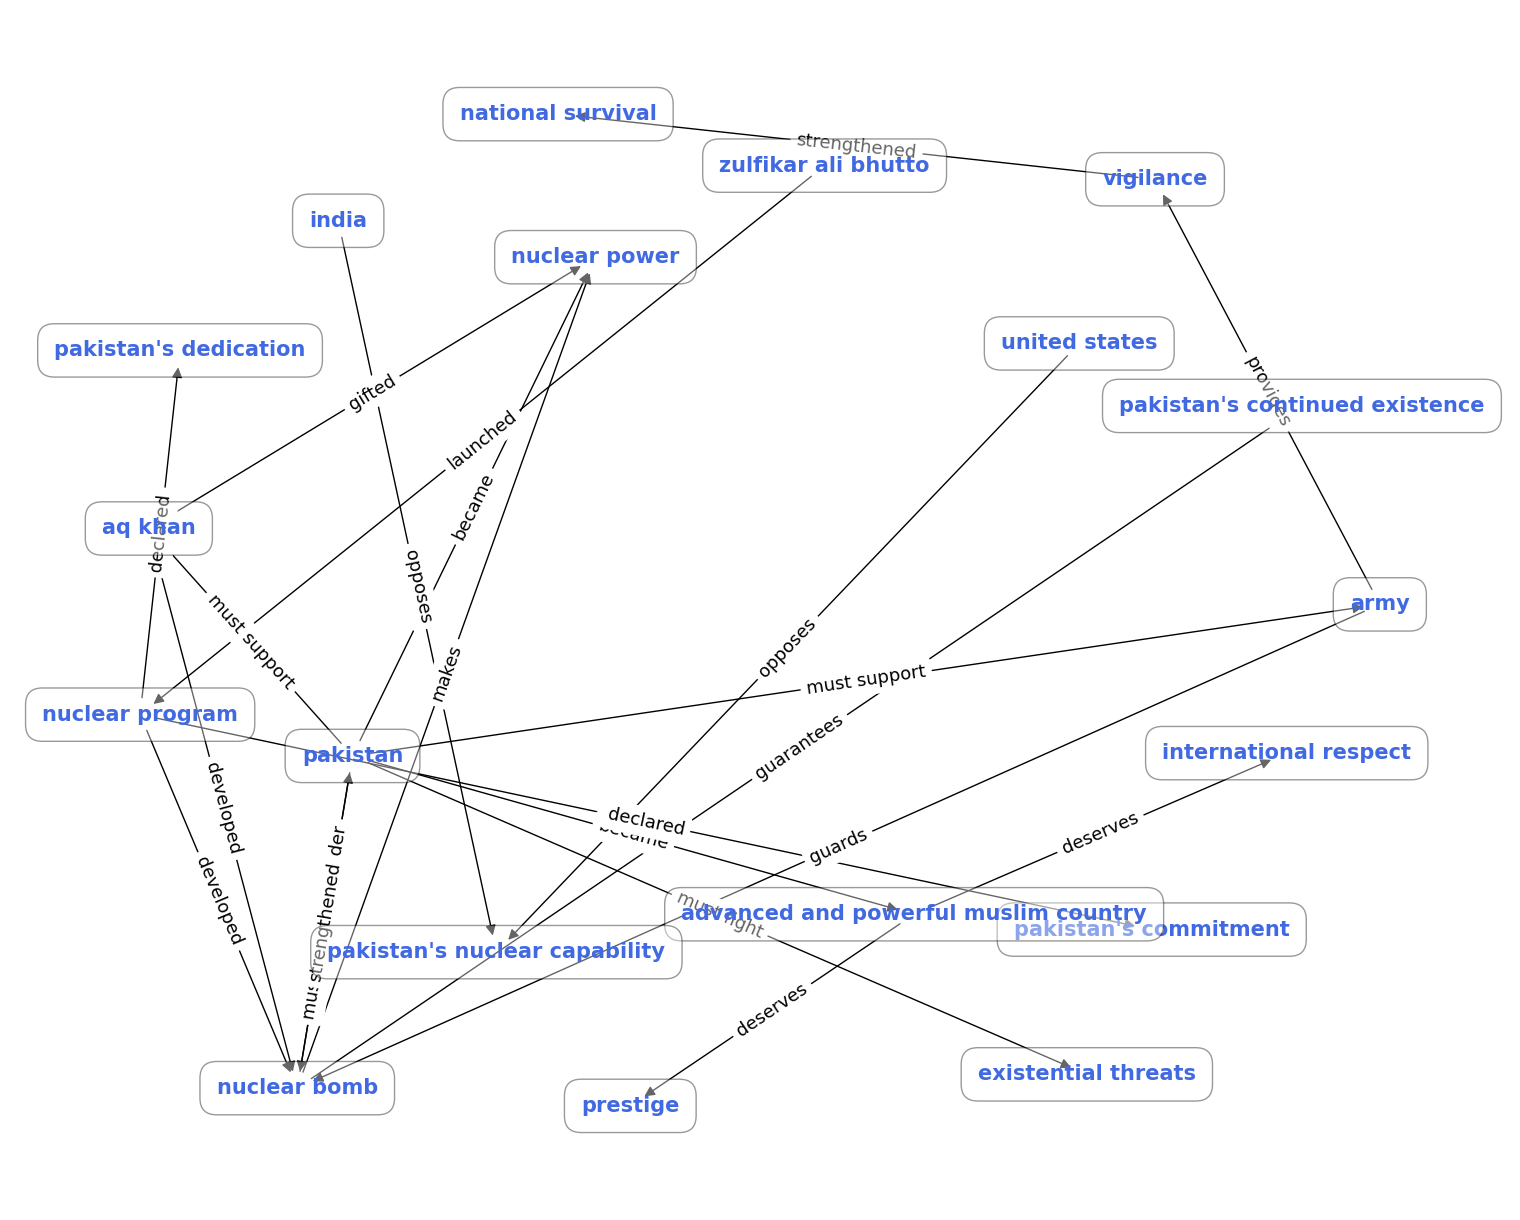

In [26]:
cmap = nx.DiGraph()

for triple in correctTriples:
    s = str(triple[0])    
    d = str(triple[2])
    cmap.add_edge(s, d, predicate=triple[1])
    #print(triple)

print("Nodes:",len(cmap.nodes))
print("Edges:",len(cmap.edges))
for e in cmap.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cmap, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cmap, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cmap.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cmap,'predicate')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Dump the Knowledge Graph on "Knowledge Graph.json" 

# Create Causal Trigger Words Dictionary along with their synonyms.

# Writing causal trigger words dictionary to text file (dictionary.txt)

# Reading causal trigger words dictionary from text file (dictionary.txt) to list 

In [27]:
synonyms = []

my_file = open(".\old_dictionary_V2a.txt", "r")
  
data = my_file.read()
  
synonyms = data.split("\n")
#print(data_into_list)
my_file.close()

print(len(synonyms))

3227


# Filter Causal triples along with their causal sentences from SVO triples based upon causal trigger words dictionary.

In [28]:
#new

causeffect = [] #without duplicates
causalSentences = [] #with duplicates

lemma_function = WordNetLemmatizer()
for s,st in zip(sentences2,correctTriples):
    check = False
    tokens = word_tokenize(str(st[1]))
    for token, tag in pos_tag(tokens):
        tok = token
        lemma = lemma_function.lemmatize(token)
        stem = ps.stem(token)
        
    for synonym in synonyms:
        if synonym == lemma or synonym == tok or synonym == stem:
            if len(causeffect) == 0:
                causeffect.append(st)
                causalSentences.append(s)
            else:
                for ct in causeffect:
                    if str(st[0]) == str(ct[0]) and str(st[1]) == str(ct[1]) and str(st[2]) == str(ct[2]):
                        check = True
                        break;
                if check == False:
                    causeffect.append(st)
                    causalSentences.append(s)
            break
    

print(len(causalSentences))
print(len(causeffect))
for causalSentence, causalTriple  in zip(causalSentences, causeffect):
    print(causalSentence, causalTriple)

# for causalSentence in causalSentences:
#     print(causalSentence)

16
16
zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication)
aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb)
nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan)
nuclear bomb makes nuclear power. (nuclear bomb, makes, nuclear power)
pakistan must never surrender nuclear bomb. (pakistan, must never surrender, nuclear bomb)
pakistan must fight off existential threats. (pakistan, must fight, existential threats)
pakistan must support army and aq khan. (pakistan, must support, army)
pakistan must support army and aq khan. (pakistan, must support, aq khan)
army guards nuclear bomb. (army, guards, nuclear bomb)
aq khan gifted nuclear power. (aq khan, gifted, nuclear 

# Delete non causal triples as per ChatGPT

In [30]:
# For "Guardians of Pakistan"
# toDelete = [("pakistan army", "comprises", "muslim warriors"), ("pakistan army", "arose", "partition"),
#             ("pakistan", "faced", "enemies"), ("pakistan army", "has confronted", "challenges"), 
#             ("indians",  "engaged",  "malicious plots"),  ("pakistanis",  "must support",  "pakistan army"), 
#             ("pakistan army", "defend", "enemies")]

# For "United Afghanistan"
# toDelete = [("afghanistan's unification", "necessitates", "afghanistan's unification"), 
#             ("taliban", "left", "afghanistan"), ("afghans", "got", "opportunity")]


# For "Conspiracies all around"
# toDelete = [("syria", "straddles", "europe"), ("syria", "straddles", "middle east")]

# For "Food Insecurity"
# toDelete = [("pakistan army", "comprises", "muslim warriors"), ("pakistan army", "arose", "partition"),
#             ("pakistan", "faced", "enemies"), ("pakistan army", "has confronted", "challenges"), 
#             ("indians",  "engaged",  "malicious plots"),  ("pakistanis",  "must support",  "pakistan army"), 
#             ("pakistan army", "defend", "enemies")]


# For "Pakistan's Nuclear Pride"
toDelete = [("aq khan", "gifted", "nuclear power")]


# moderate to heavy rainfall is expected to continue during the next two weeks across uganda.


for i in toDelete:
    for causalSentence, causalTriple  in zip(causalSentences, causeffect):
        if i[0] == str(causalTriple[0]) and i[1] == str(causalTriple[1]) and i[2] == str(causalTriple[2]):
            causalSentences.remove(causalSentence)
            causeffect.remove(causalTriple)
            break

print(len(causalSentences))
print(len(causeffect))
for causalSentence, causalTriple  in zip(causalSentences, causeffect):
    print(causalSentence, causalTriple)

15
15
zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication)
aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb)
nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan)
nuclear bomb makes nuclear power. (nuclear bomb, makes, nuclear power)
pakistan must never surrender nuclear bomb. (pakistan, must never surrender, nuclear bomb)
pakistan must fight off existential threats. (pakistan, must fight, existential threats)
pakistan must support army and aq khan. (pakistan, must support, army)
pakistan must support army and aq khan. (pakistan, must support, aq khan)
army guards nuclear bomb. (army, guards, nuclear bomb)
army provides vigilance. (army, provides, vigilance)
vig

# Plot the Causal Graph.

Nodes: 13
Edges: 12
zulfikar ali bhutto , {'predicade': 'launched'} , nuclear program
nuclear program , {'predicade': 'declared'} , pakistan's commitment
nuclear program , {'predicade': 'declared'} , pakistan's dedication
nuclear program , {'predicade': 'developed'} , nuclear bomb
aq khan , {'predicade': 'developed'} , nuclear bomb
nuclear bomb , {'predicade': 'strengthened'} , pakistan
nuclear bomb , {'predicade': 'makes'} , nuclear power
nuclear bomb , {'predicade': 'guarantees'} , pakistan's continued existence
pakistan , {'predicade': 'must fight'} , existential threats
pakistan , {'predicade': 'must support'} , army
army , {'predicade': 'provides'} , vigilance
vigilance , {'predicade': 'strengthened'} , national survival


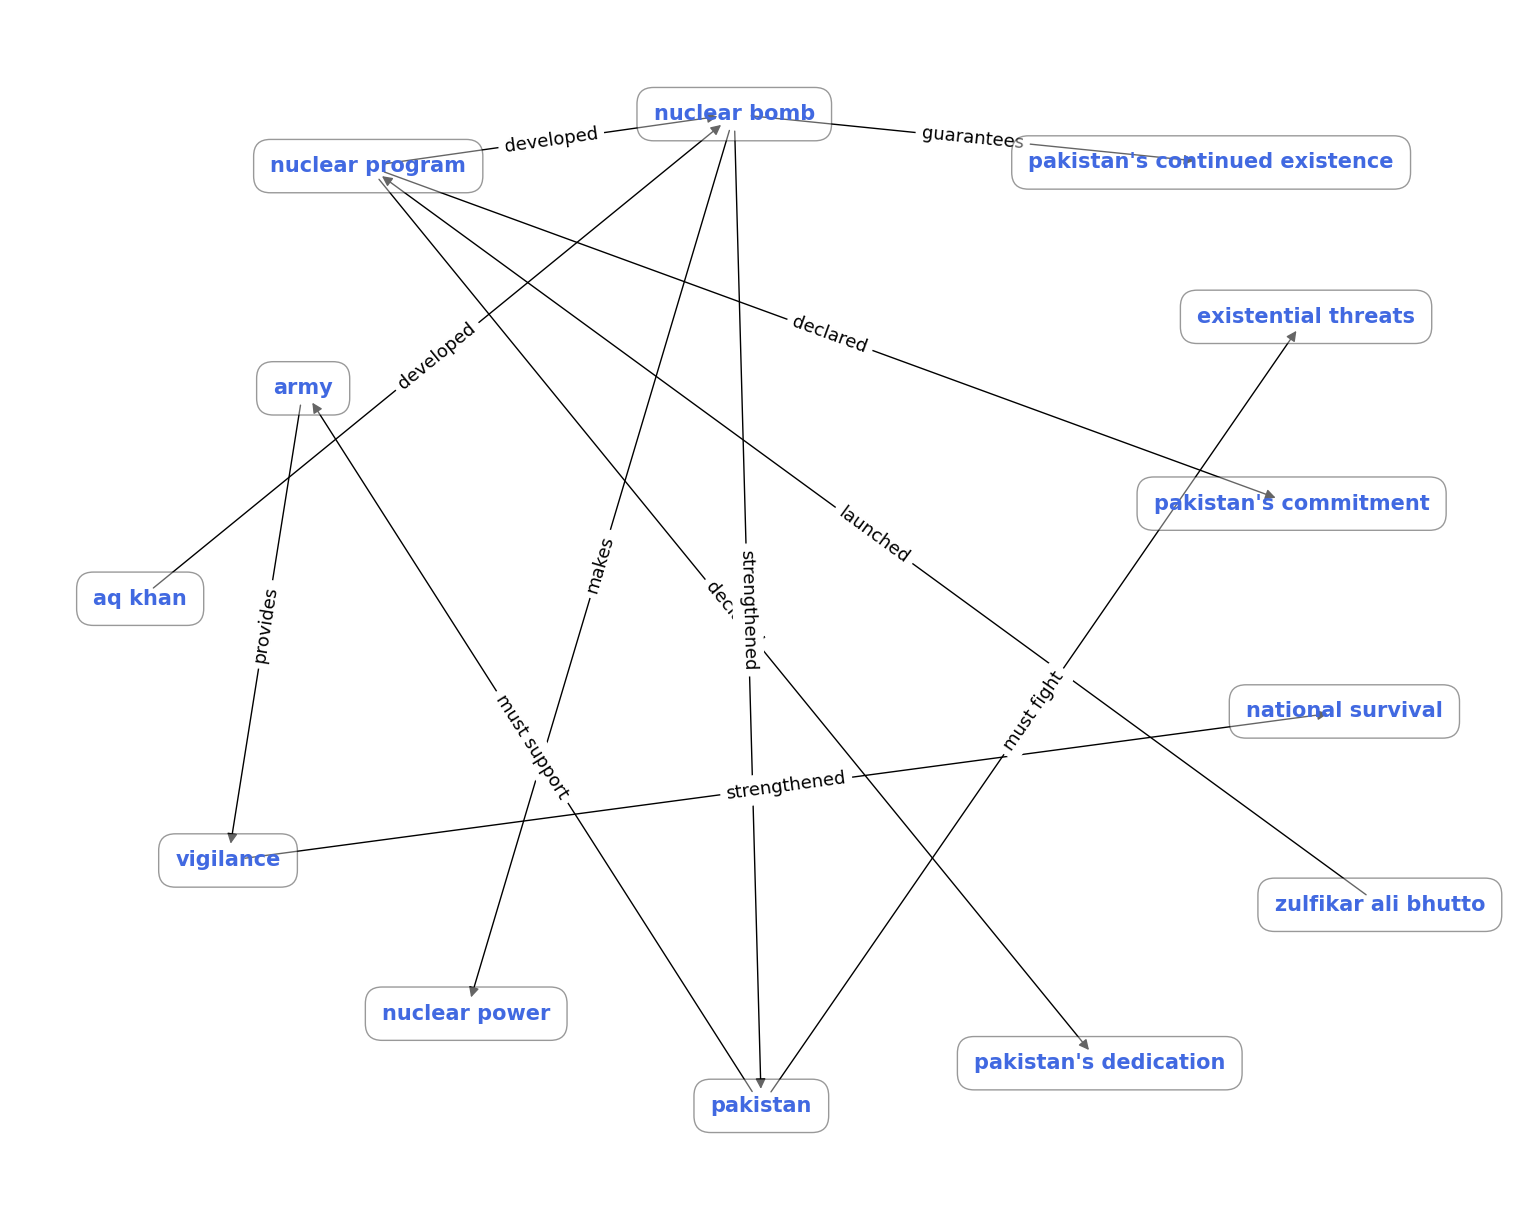

In [31]:
#new (DAG Implementation)
#without duplicates
dagCauseTriples = []
cg = nx.DiGraph()
dagCauseSents = []
dagCauseVerbs = []

for ce,se in zip(causeffect,causalSentences):
    s = str(ce[0])    
    d = str(ce[2])
    #cg.add_node(s,id = str(s),title=str(s),x=615,y=200) #for d3js
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    #cg.add_node(d,id = str(d),title=str(d),x=615,y=200) #for d3js
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))
#     dagCauseTriples.append(ce)
#     dagCauseSents.append(se)
#     dagCauseVerbs.append(str(ce[1]))
    if nx.is_directed_acyclic_graph(cg) is False:
        cg.remove_edge(s, d)
#         dagCauseTriples.remove(ce)
#         dagCauseSents.remove(se)  
#         dagCauseVerbs.remove(str(ce[1]))
    else:
        for dummy,dummy1,dummy2 in zip(dagCauseTriples,dagCauseSents,dagCauseVerbs):
            if str(dummy[0]) == s and str(dummy[2]) == d:
                dagCauseTriples.remove(dummy)
                dagCauseSents.remove(dummy1)  
                dagCauseVerbs.remove(dummy2)
                break;
        dagCauseTriples.append(ce)
        dagCauseSents.append(se)
        dagCauseVerbs.append(str(ce[1]))

print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))
for e in cg.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Make Causal Graph Fully Connected (Change value of 'sentence' and 'ce' tuple)

# Print DAG Causal Triples along with Sentences and Verbs

In [32]:
print(len(dagCauseTriples))
print(len(dagCauseSents))
print(len(dagCauseVerbs))

for causalSentence, causalTriple, causalVerb  in zip(dagCauseSents, dagCauseTriples, dagCauseVerbs):
    print(causalSentence, causalTriple, causalVerb)

# for causalTriple in dagCauseTriples:
#     print(causalTriple)

12
12
12
zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program) launched
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment) declared
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication) declared
aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb) developed
nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan) strengthened
nuclear bomb makes nuclear power. (nuclear bomb, makes, nuclear power) makes
pakistan must fight off existential threats. (pakistan, must fight, existential threats) must fight
pakistan must support army and aq khan. (pakistan, must support, army) must support
army provides vigilance. (army, provides, vigilance) provides
vigilance strengthened national survival. (vigilance, strengthened, national survival) strengthened
nuclear bomb guarantees pakista

# Plot the Causal Graph on using Pyvis "Causal Graph.html" file 

In [33]:
#nt = Network("500px", "1000px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Causal Graph')
nt = Network("660px", "1515px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Causal Graph')

for dm in dagCauseTriples:
    #color = "#ffffff"
    nt.add_node(str(dm[0]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_node(str(dm[2]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_edge(str(dm[0]),str(dm[2]),label=str(dm[1]), weight=10, physics='false',color='black')

#nt.show_buttons(filter_=['physics'])
nt.set_edge_smooth('discrete')
nt.show("./Pyvis Graph/Causal Graph.html")

# Dump the Causal Graph on "Causal Graph.json" file 

# Remove Duplicates from Causal Triples

# Remove Duplicates from causalSentences

# Causal Triples' Polarity (Whole) 

### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [34]:
# https://huggingface.co/cardiffnlp/twitter-xlm-roberta-base-sentiment?text=extremely+negative
# https://huggingface.co/blog/sentiment-analysis-python
# https://huggingface.co/models?pipeline_tag=text-classification&sort=downloads&search=sentiment

# returns score as output in the range [0,1] 
# mapped to (1,0,-1) -> (pos, neutral, neg)

allen = []
for sent in dagCauseTriples:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        score = round(score,3)
        allen.append(score)
        # allen.append(-1)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        scores[2] = round(scores[2],3)
        allen.append(scores[2])
        # allen.append(1)
    else:
        # allen.append(scores[1])
        allen.append(0)
    
for causalSentence, polarity  in zip(dagCauseTriples, allen):
    print(causalSentence, polarity)

# text = "must fight"
# encoded_input = tokenizer(text, return_tensors='pt')
# output = model(**encoded_input)
# scores = output[0][0].detach().numpy()
# scores = softmax(scores)
# if scores[0] > scores[1] and scores[0] > scores[2]:
#     print('negative')
# elif scores[2] > scores[1] and scores[2] > scores[0]:
#     print('positive')
# else:
#     print('neutral')

# ranking = np.argsort(scores)
# # print(ranking)
# ranking = ranking[::-1]
# for i in range(scores.shape[0]):
#     l = config.id2label[ranking[i]]
#     s = scores[ranking[i]]
#     print(f"{i+1}) {l} {np.round(float(s), 4)}")

(zulfikar ali bhutto, launched, nuclear program) 0
(nuclear program, declared, pakistan's commitment) 0
(nuclear program, declared, pakistan's dedication) 0.472
(aq khan, developed, nuclear bomb) 0
(nuclear bomb, strengthened, pakistan) 0
(nuclear bomb, makes, nuclear power) 0
(pakistan, must fight, existential threats) -0.837
(pakistan, must support, army) 0
(army, provides, vigilance) 0
(vigilance, strengthened, national survival) 0.498
(nuclear bomb, guarantees, pakistan's continued existence) 0
(nuclear program, developed, nuclear bomb) 0


### [Afinn]

In [35]:
#https://darenr.github.io/afinn/
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/
#https://github.com/thisandagain/sentiment

# returns score as output in the range [-5,5] 
# mapped to (1,0,-1) -> (pos, neutral, neg)

afinn = []
for sent in dagCauseTriples:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    score = round(score,3)
    afinn.append(score)
    # if score > 0:
    #     #print('positive')
    #     afinn.append(1)
    # elif score < 0:
    #     #print('negative')
    #     afinn.append(-1)
    # else:
    #     #print('neutral')
    #     afinn.append(0)
        
for causalSentence, polarity  in zip(dagCauseTriples, afinn):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 0.2
(nuclear program, declared, pakistan's commitment) 0.4
(nuclear program, declared, pakistan's dedication) 0.4
(aq khan, developed, nuclear bomb) -0.2
(nuclear bomb, strengthened, pakistan) 0.2
(nuclear bomb, makes, nuclear power) -0.2
(pakistan, must fight, existential threats) -0.6
(pakistan, must support, army) 0.4
(army, provides, vigilance) 0.0
(vigilance, strengthened, national survival) 0.4
(nuclear bomb, guarantees, pakistan's continued existence) -0.2
(nuclear program, developed, nuclear bomb) -0.2


### [Vader]

In [36]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring

# returns compound score as output in the range [-1,1] 
# mapped to (1,0,-1) -> (pos, neutral, neg)

vader = []

def vadersentimentanalysis(review):
    # negpos = []
    vs = analyzer.polarity_scores(review)
    return vs['compound']
    # negpos.append(vs['neg'])
    # negpos.append(vs['pos'])
    # return negpos

# def vader_analysis(compound):
#     # print(compound)
#     if compound >= 0.05:
#     #if compound > 0:
#         vader.append(1)
#         return 'Positive'
#     elif compound <= -0.05 :
#     #elif compound < 0:
#         vader.append(-1)
#         return 'Negative'
#     elif  compound > -0.05 and compound < 0.05:
#     #elif  compound == 0:
#         vader.append(0)
#         return 'Neutral'

# def vader_analysis(negpos):
#      if negpos[0] > negpos[1]:
#         vader.append(-1)
#         return 'Negative'
#      elif negpos[1] > negpos[0]:
#         vader.append(1)
#         return 'Positive'
    
for sent in dagCauseTriples:
    #print(sent)
    compound = vadersentimentanalysis(str(sent))
    # print(compound)
    compound = round(compound,3)
    vader.append(compound)
    # vader_analysis(compound)
    
for causalSentence, polarity  in zip(dagCauseTriples, vader):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 0.128
(nuclear program, declared, pakistan's commitment) 0.382
(nuclear program, declared, pakistan's dedication) 0.0
(aq khan, developed, nuclear bomb) -0.494
(nuclear bomb, strengthened, pakistan) -0.103
(nuclear bomb, makes, nuclear power) -0.494
(pakistan, must fight, existential threats) -0.66
(pakistan, must support, army) 0.402
(army, provides, vigilance) 0.0
(vigilance, strengthened, national survival) 0.421
(nuclear bomb, guarantees, pakistan's continued existence) -0.494
(nuclear program, developed, nuclear bomb) -0.494


### [SentiStrength]

In [37]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/

# returns score as output in the range [-4,4] 
# mapped to (1,0,-1) -> (pos, neutral, neg)

sentiStrength = []

for sent in dagCauseTriples:
    #print(sent)
    result = senti.getSentiment(str(sent), score='scale')
    # print(result)
    result = result[0]/4
    result = round(result,3)
    sentiStrength.append(result)
    # if result[0] > 0:
    #     #print('Positive')
    #     sentiStrength.append(1)
    # elif result[0] < 0:
    #     sentiStrength.append(-1)
    #     #print('Negative')
    # else:
    #     sentiStrength.append(0)
    # #    print('Neutral')

for causalSentence, polarity  in zip(dagCauseTriples, sentiStrength):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 0.0
(nuclear program, declared, pakistan's commitment) 0.0
(nuclear program, declared, pakistan's dedication) 0.0
(aq khan, developed, nuclear bomb) -0.25
(nuclear bomb, strengthened, pakistan) -0.25
(nuclear bomb, makes, nuclear power) -0.25
(pakistan, must fight, existential threats) -0.5
(pakistan, must support, army) 0.25
(army, provides, vigilance) 0.0
(vigilance, strengthened, national survival) 0.0
(nuclear bomb, guarantees, pakistan's continued existence) -0.25
(nuclear program, developed, nuclear bomb) -0.25


### Data Frame (Causal Triples Whole)

In [38]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df_CTW = pd.DataFrame(list(zip(dagCauseTriples, allen, afinn, vader,sentiStrength)), columns =['Causal Triple', 'HuggingFace','Afinn','Vader','SentiStrength'])
# df2["Weight"] = round(df2.sum(axis=1)/4,3)
df_CTW["Weight"] = df_CTW.sum(axis=1)

for i in df_CTW.index:
    count = 0
#     print(df2["Afinn"][i])
    if df_CTW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CTW["Afinn"][i] != 0:
        count = count + 1
    if df_CTW["Vader"][i] != 0:
        count = count + 1
    if df_CTW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CTW["Weight"][i] = round(df_CTW["Weight"][i]/count,3)

sentPolarity = []
triplesWeight_sentLevel = []

for index, row in df_CTW.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    triplesWeight_sentLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CTW["Polarity"] = sentPolarity
df_CTW.style

C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Triple,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,"(zulfikar ali bhutto, launched, nuclear program)",0.000000,0.200000,0.128000,0.000000,0.164000,Weak Positive
1,"(nuclear program, declared, pakistan's commitment)",0.000000,0.400000,0.382000,0.000000,0.391000,Moderate Positive
2,"(nuclear program, declared, pakistan's dedication)",0.472000,0.400000,0.000000,0.000000,0.436000,Moderate Positive
3,"(aq khan, developed, nuclear bomb)",0.000000,-0.200000,-0.494000,-0.250000,-0.315000,Moderate Negative
4,"(nuclear bomb, strengthened, pakistan)",0.000000,0.200000,-0.103000,-0.250000,-0.051000,Weak Negative
5,"(nuclear bomb, makes, nuclear power)",0.000000,-0.200000,-0.494000,-0.250000,-0.315000,Moderate Negative
6,"(pakistan, must fight, existential threats)",-0.837000,-0.600000,-0.660000,-0.500000,-0.649000,Strong Negative
7,"(pakistan, must support, army)",0.000000,0.400000,0.402000,0.250000,0.351000,Moderate Positive
8,"(army, provides, vigilance)",0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
9,"(vigilance, strengthened, national survival)",0.498000,0.400000,0.421000,0.000000,0.440000,Moderate Positive


# Causal Sentences' Polarity (Whole) 

### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [39]:
def Allen_sents_SentLevel(causalSentences):
    allen = []
    for sent in causalSentences:
        encoded_input = tokenizer(str(sent), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            score = round(score,3)
            allen.append(score)
            # allen.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            scores[2] = round(scores[2],3)
            allen.append(scores[2])
            # allen.append(1)
        else:
            # allen.append(scores[1])
            allen.append(0)
    return allen

### [Afinn]

In [40]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/

#output (Pos,neg,neural)
def Afinn_sents_SentLevel(causalSentences):
    afinn = []
    for sent in causalSentences:
        #print(sent)
        score = afn.score(str(sent))
        #print(score)
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        score = round(score,3)
        afinn.append(score)
        # if score > 0:
        #     #print('positive')
        #     afinn.append(1)
        # elif score < 0:
        #     #print('negative')
        #     afinn.append(-1)
        # else:
        #     #print('neutral')
        #     afinn.append(0)
    return afinn

#for causalSentence, polarity  in zip(causalSentences, afinn):
#    print(causalSentence, polarity)

### [Vader]

In [41]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
#output (Pos,neg,neural)

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

# def vader_analysis(compound):
#     #vader = []
#     if compound >= 0.05:
#         #vader.append(1)
#         return 1
#     elif compound <= -0.05 :
#         #vader.append(-1)
#         return -1
        
#     elif  compound > -0.05 and compound < 0.05:
#         #vader.append(0)
#         return 0
#     #return vader
    
def Vader_sents_SentLevel(causalSentences):
    vader = []
    for sent in causalSentences:
        #print(sent)
        #vaderTup = []
        compound = vadersentimentanalysis(str(sent))
        compound = round(compound,3)
        vader.append(compound)
        # res = vader_analysis(compound)
        #vaderTup.append(res)
        # vader.append(res)
    return vader

#vader = Vader_sents_SentLevel(causalSents)
#vader
#for causalSentence, polarity  in zip(causalSentences, vader):
#    print(causalSentence, polarity)

### [SentiStrength]

In [42]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/
#output (Pos,neg)

def Senti_sents_SentLevel(causalSentences):
    sentiStrength = []
    for sent in causalSentences:
        #print(sent)
        result = senti.getSentiment(str(sent), score='scale')
        #print(result)
        result = result[0]/4
        result = round(result,3)
        sentiStrength.append(result)
        # if result[0] > 0:
        #     sentiStrength.append(1)
        # elif result[0] < 0:
        #     sentiStrength.append(-1)
        # else:
        #     sentiStrength.append(0)
    return sentiStrength

#for causalSentence, polarity  in zip(causalSentences, sentiStrength):
#    print(causalSentence, polarity)

### [SentiWordnet]

### [SentiWordNet OnlyVerbs]

### Detect Causal Sentences' Polarity (Sent Level) without duplicates

### Detect Causal Sentences' Polarity (Sent Level) with duplicates

### Data Frame (Causal Sentence at Sentence Level)

In [43]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

allen = Allen_sents_SentLevel(dagCauseSents)
afinn = Afinn_sents_SentLevel(dagCauseSents)
vader = Vader_sents_SentLevel(dagCauseSents)
sentiStrength = Senti_sents_SentLevel(dagCauseSents)

df_CSW = pd.DataFrame(list(zip(dagCauseSents, allen, afinn, vader,sentiStrength)), columns =['Causal Sentence', 'HuggingFace','Afinn','Vader','SentiStrength'])
# df2["Weight"] = round(df2.sum(axis=1)/4,3)

df_CSW["Weight"] = df_CSW.sum(axis=1)

for i in df_CSW.index:
    count = 0
#     print(df2["Afinn"][i])
    if df_CSW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CSW["Afinn"][i] != 0:
        count = count + 1
    if df_CSW["Vader"][i] != 0:
        count = count + 1
    if df_CSW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CSW["Weight"][i] = round(df_CSW["Weight"][i]/count,3)

sentPolarity = []
sentsWeight_sentLevel = []

for index, row in df_CSW.iterrows():
    sentWeightTuple = []
    weight = row['Weight']
    sentWeightTuple.append(weight)
    sentsWeight_sentLevel.append(sentWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CSW["Polarity"] = sentPolarity
df_CSW.style

C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Sentence,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,zulfikar ali bhutto launched nuclear program.,0.000000,0.200000,0.128000,0.000000,0.164000,Weak Positive
1,nuclear program declared pakistan's commitment and pakistan's dedication.,0.569000,0.800000,0.382000,0.000000,0.584000,Moderate Positive
2,nuclear program declared pakistan's commitment and pakistan's dedication.,0.569000,0.800000,0.382000,0.000000,0.584000,Moderate Positive
3,aq khan developed nuclear bomb.,0.000000,-0.200000,-0.494000,-0.250000,-0.315000,Moderate Negative
4,nuclear bomb strengthened pakistan.,0.575000,0.200000,-0.103000,-0.250000,0.105000,Weak Positive
5,nuclear bomb makes nuclear power.,0.000000,-0.200000,-0.494000,-0.250000,-0.315000,Moderate Negative
6,pakistan must fight off existential threats.,-0.563000,-0.600000,-0.660000,-0.500000,-0.581000,Moderate Negative
7,pakistan must support army and aq khan.,0.365000,0.400000,0.402000,0.250000,0.354000,Moderate Positive
8,army provides vigilance.,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
9,vigilance strengthened national survival.,0.760000,0.400000,0.421000,0.000000,0.527000,Moderate Positive


# Causal Triples' Polarity (Token Level) 

### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [44]:
allen_word = []
allen_tuple = []

for tokenTuple in dagCauseTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        # print(token)
        encoded_input = tokenizer(str(token), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        # print(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            score = round(score,3)
            allen_tuple.append(score)
            # allen_tuple.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            scores[2] = round(scores[2],3)
            allen_tuple.append(scores[2])
            # allen_tuple.append(1)
        else:
            # allen_tuple.append(scores[1])
            allen_tuple.append(0)
    allen_word.append(allen_tuple)
    allen_tuple = []
                
for a,b in zip(dagCauseTriples,allen_word):
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0, 0, 0]
(nuclear program, declared, pakistan's commitment) [0, 0, 0.396]
(nuclear program, declared, pakistan's dedication) [0, 0, 0.534]
(aq khan, developed, nuclear bomb) [0, 0, -0.433]
(nuclear bomb, strengthened, pakistan) [-0.433, 0.379, -0.387]
(nuclear bomb, makes, nuclear power) [-0.433, 0, 0]
(pakistan, must fight, existential threats) [-0.387, -0.465, -0.822]
(pakistan, must support, army) [-0.387, 0.419, 0]
(army, provides, vigilance) [0, 0, -0.425]
(vigilance, strengthened, national survival) [-0.425, 0.379, 0]
(nuclear bomb, guarantees, pakistan's continued existence) [-0.433, 0, 0]
(nuclear program, developed, nuclear bomb) [0, 0, -0.433]


### [Afinn] 

In [45]:
afinn_word = []
afinn_tuple = []

for tokenTuple in dagCauseTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
        #if str(token) not in marks:
            #print(token)
        score = afn.score(str(token))
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        score = round(score,3)
        afinn_tuple.append(score)
        # if score > 0:
        #         #print('positive')
        #     afinn_tuple.append(1)
        # elif score < 0:
        #         #print('negative')
        #     afinn_tuple.append(-1)
        # else:
        #         #print('neutral')
        #     afinn_tuple.append(0)
    afinn_word.append(afinn_tuple)
    afinn_tuple = []

for a,b in zip(dagCauseTriples,afinn_word):
   # print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0.0, 0.2, 0.0]
(nuclear program, declared, pakistan's commitment) [0.0, 0.0, 0.4]
(nuclear program, declared, pakistan's dedication) [0.0, 0.0, 0.4]
(aq khan, developed, nuclear bomb) [0.0, 0.0, -0.2]
(nuclear bomb, strengthened, pakistan) [-0.2, 0.4, 0.0]
(nuclear bomb, makes, nuclear power) [-0.2, 0.0, 0.0]
(pakistan, must fight, existential threats) [0.0, -0.2, -0.4]
(pakistan, must support, army) [0.0, 0.4, 0.0]
(army, provides, vigilance) [0.0, 0.0, 0.0]
(vigilance, strengthened, national survival) [0.0, 0.4, 0.0]
(nuclear bomb, guarantees, pakistan's continued existence) [-0.2, 0.0, 0.0]
(nuclear program, developed, nuclear bomb) [0.0, 0.0, -0.2]


### [Vader] 

In [46]:
vader_word = []
vader_tuple = []

for tokenTuple in dagCauseTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) not in marks:
        vs = analyzer.polarity_scores(str(token))
        compound = vs['compound']
        compound = round(compound,3)
        vader_tuple.append(compound)
        # if compound >= 0.05:
        #     vader_tuple.append(1)   
        # elif compound <= -0.05 :
        #     vader_tuple.append(-1)
        # elif  compound > -0.05 and compound < 0.05:
        #     vader_tuple.append(0)
    vader_word.append(vader_tuple)
    vader_tuple = []

for a,b in zip(dagCauseTriples,vader_word):
    #print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0.0, 0.128, 0.0]
(nuclear program, declared, pakistan's commitment) [0.0, 0.0, 0.382]
(nuclear program, declared, pakistan's dedication) [0.0, 0.0, 0.0]
(aq khan, developed, nuclear bomb) [0.0, 0.0, -0.494]
(nuclear bomb, strengthened, pakistan) [-0.494, 0.421, 0.0]
(nuclear bomb, makes, nuclear power) [-0.494, 0.0, 0.0]
(pakistan, must fight, existential threats) [0.0, -0.382, -0.421]
(pakistan, must support, army) [0.0, 0.402, 0.0]
(army, provides, vigilance) [0.0, 0.0, 0.0]
(vigilance, strengthened, national survival) [0.0, 0.421, 0.0]
(nuclear bomb, guarantees, pakistan's continued existence) [-0.494, 0.0, 0.0]
(nuclear program, developed, nuclear bomb) [0.0, 0.0, -0.494]


### [SentiStrength] 

In [47]:
senti_word = []
senti_tuple = []

for tokenTuple in dagCauseTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        #if str(token) not in marks:
        #print(token)
        result = senti.getSentiment(str(token), score='scale')
            #print(result)
        result = result[0]/4
        result = round(result,3)
        senti_tuple.append(result)
        # if result[0] > 0:
        #     senti_tuple.append(1)
        # elif result[0] < 0:
        #     senti_tuple.append(-1)
        # else:
        #     senti_tuple.append(0)
    senti_word.append(senti_tuple)
    senti_tuple = []
    
for a,b in zip(dagCauseTriples,senti_word):
    #print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0.0, 0.0, 0.0]
(nuclear program, declared, pakistan's commitment) [0.0, 0.0, 0.0]
(nuclear program, declared, pakistan's dedication) [0.0, 0.0, 0.0]
(aq khan, developed, nuclear bomb) [0.0, 0.0, -0.25]
(nuclear bomb, strengthened, pakistan) [-0.25, 0.0, 0.0]
(nuclear bomb, makes, nuclear power) [-0.25, 0.0, 0.0]
(pakistan, must fight, existential threats) [0.0, -0.5, -0.5]
(pakistan, must support, army) [0.0, 0.25, 0.0]
(army, provides, vigilance) [0.0, 0.0, 0.0]
(vigilance, strengthened, national survival) [0.0, 0.0, 0.0]
(nuclear bomb, guarantees, pakistan's continued existence) [-0.25, 0.0, 0.0]
(nuclear program, developed, nuclear bomb) [0.0, 0.0, -0.25]


### Data Frame (Causal Triples Token Level)

In [48]:
#new

sum_list = []
sum_tup = []
limit= len(dagCauseTriples)

for i in range(0,limit):
    for j in range(0,len(allen_word[i])):
        count = 0
        if afinn_word[i][j] != 0: 
            count = count +1
        if vader_word[i][j] != 0:
            count = count +1
        if senti_word[i][j] != 0:
            count = count +1
        if allen_word[i][j] != 0:
            count = count +1
        if count == 0:
            count = 1
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        res = res/count
        res = round(res,3)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -1 and weight < -0.6:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -0.6 and weight < -0.3:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -0.3 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 1 and weight > 0.6:
                tokenPolarity.append('Strong Positive')
            elif weight <= 0.6 and weight > 0.3:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 0.3 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

triplesWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight, 3)
    if tripleWeight > 1: 
        tripleWeight = 1
    if tripleWeight < -1:
        tripleWeight = -1
    weightSumTup.append(tripleWeight)
    triplesWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

triplePolarity_list = DetectPolarity(triplesWeight_TokenLevel)

token_list = []
for i in dagCauseTriples:
    dummy = []
    for j in i:
        dummy.append(str(j))
    token_list.append(dummy)
    
df1 = pd.DataFrame(list(zip(dagCauseTriples,token_list, allen_word, afinn_word,vader_word,senti_word,sum_list,tokenPolarity_list,triplesWeight_TokenLevel, triplePolarity_list)), 
                      columns =['Causal Triple', "Tokens", 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Triple Weight','Triple Polarity'])

# df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)
df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)

prev = -1
for index, row in df1.iterrows():
    if prev == index:
        row['Causal Triple'] = ""
        row['Triple Weight'] = ""
        row['Triple Polarity'] = ""
    prev = index
df1.style

,Causal Triple,Tokens,HuggingFace,Afinn,Vader,SentiStrength,Token Weight,Token Polarity,Triple Weight,Triple Polarity
0,"(zulfikar ali bhutto, launched, nuclear program)",zulfikar ali bhutto,0,0.000000,0.000000,0.000000,0.000000,Neutral,[0.164],['Weak Positive']
0,,launched,0,0.200000,0.128000,0.000000,0.164000,Weak Positive,,
0,,nuclear program,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
1,"(nuclear program, declared, pakistan's commitment)",nuclear program,0,0.000000,0.000000,0.000000,0.000000,Neutral,[0.393],['Moderate Positive']
1,,declared,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
1,,pakistan's commitment,0.396,0.400000,0.382000,0.000000,0.393000,Moderate Positive,,
2,"(nuclear program, declared, pakistan's dedication)",nuclear program,0,0.000000,0.000000,0.000000,0.000000,Neutral,[0.467],['Moderate Positive']
2,,declared,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
2,,pakistan's dedication,0.534,0.400000,0.000000,0.000000,0.467000,Moderate Positive,,
3,"(aq khan, developed, nuclear bomb)",aq khan,0,0.000000,0.000000,0.000000,0.000000,Neutral,[-0.344],['Moderate Negative']


In [49]:
triplesPolarity_list = []
tripleWeight_TokenLevel = []
for i,j in zip(triplesWeight_TokenLevel,triplePolarity_list):
    tripleWeight_TokenLevel.append(i[0])
    triplesPolarity_list.append(j[0]) 
    
df_CTT = pd.DataFrame(list(zip(tripleWeight_TokenLevel, triplesPolarity_list)), columns =['Weight','Polarity'])
df_CTT.style

,Weight,Polarity
0,0.164000,Weak Positive
1,0.393000,Moderate Positive
2,0.467000,Moderate Positive
3,-0.344000,Moderate Negative
4,-0.331000,Moderate Negative
5,-0.344000,Moderate Negative
6,-1.000000,Strong Negative
7,-0.019000,Weak Negative
8,-0.425000,Moderate Negative
9,-0.025000,Weak Negative


# Causal Sentences' Polarity (Token Level) 

### Generating list of tokens without stop words and punctuation marks.

In [50]:
def GenerateTokens(causalSentences):
    marks = ['.',',','(',')','-',':',';','/',"'s",'_','__','--','"', '’', '—']
    tagsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    token_list = []
   
    for sent in causalSentences:
        tokens = word_tokenize(str(sent))
        tags = pos_tag(tokens)
        token_tuple = []
        for token,tag in tags:
            if str(token) not in marks:
                if str(token) not in stopwords.words() or tag in tagsList:
                    token_tuple.append(str(token))
        token_list.append(token_tuple)
    return token_list
        
#print(len(token_list))
#print(token_list)

### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [51]:
def Allen_sents_TokenLevel(token_list):
    allen_word = []
    allen_tuple = []
    for tokenTuple in token_list:
        # print(tokenTuple)
        for token in tokenTuple:
            # print(token)
            encoded_input = tokenizer(str(token), return_tensors='pt')
            output = model(**encoded_input)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)
            if scores[0] > scores[1] and scores[0] > scores[2]:
                score = scores[0] * -1
                score = round(score,3)
                allen_tuple.append(score)
            elif scores[2] > scores[1] and scores[2] > scores[0]:
                scores[2] = round(scores[2],3)
                allen_tuple.append(scores[2])
            else:
                # allen_tuple.append(scores[1])
                allen_tuple.append(0)
        allen_word.append(allen_tuple)
        allen_tuple = []
    return allen_word

### [Afinn] 

In [52]:
def Afinn_sents_TokenLevel(token_list):
    afinn_word = []
    afinn_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
            #if str(token) not in marks:
                #print(token)
            score = afn.score(str(token))
            if score < -5:
                score = -5
            elif score > 5:
                score = 5
            score = score/5
            score = round(score,3)
            afinn_tuple.append(score)
            # if score > 0:
            #         #print('positive')
            #     afinn_tuple.append(1)
            # elif score < 0:
            #         #print('negative')
            #     afinn_tuple.append(-1)
            # else:
            #         #print('neutral')
            #     afinn_tuple.append(0)
        afinn_word.append(afinn_tuple)
        afinn_tuple = []
    return afinn_word

#for a in afinn_word:
#    print(len(a))
#    print(a)

### [Vader] 

In [53]:
def Vader_sents_TokenLevel(token_list):
    vader_word = []
    vader_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
            vs = analyzer.polarity_scores(str(token))
            compound = vs['compound']
            compound = round(compound,3)
            vader_tuple.append(compound)
            # if compound >= 0.05:
            #     vader_tuple.append(1)   
            # elif compound <= -0.05 :
            #     vader_tuple.append(-1)
            # elif  compound > -0.05 and compound < 0.05:
            #     vader_tuple.append(0)
        vader_word.append(vader_tuple)
        vader_tuple = []
    return vader_word

#for a in vader_word:
#    print(len(a))
#    print(a)

### [SentiStrength] 

In [54]:
def Senti_sents_TokenLevel(token_list):
    senti_word = []
    senti_tuple = []
    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
                #print(token)
            result = senti.getSentiment(str(token), score='scale')
                #print(result)
            result = result[0]/4
            result = round(result,3)
            senti_tuple.append(result)
            # if result[0] > 0:
            #     senti_tuple.append(1)
            # elif result[0] < 0:
            #     senti_tuple.append(-1)
            # else:
            #     senti_tuple.append(0)
        senti_word.append(senti_tuple)
        senti_tuple = []
    return senti_word
    
#for a in senti_word:
#    print(len(a))
#    print(a)

### Data Frame (Causal Sentences Word Level)

In [55]:
#new

token_list = GenerateTokens(dagCauseSents)
allen_word = Allen_sents_TokenLevel(token_list)
afinn_word = Afinn_sents_TokenLevel(token_list)
vader_word = Vader_sents_TokenLevel(token_list)   
senti_word = Senti_sents_TokenLevel(token_list)

sum_list = []
sum_tup = []
limit= len(dagCauseSents)

for i in range(0,limit):
    for j in range(0,len(allen_word[i])):
        count = 0
        if afinn_word[i][j] != 0: 
            count = count +1
        if vader_word[i][j] != 0:
            count = count +1
        if senti_word[i][j] != 0:
            count = count +1
        if allen_word[i][j] != 0:
            count = count +1
        if count == 0:
            count = 1
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        res = res/count
        res = round(res,3)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -1 and weight < -0.6:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -0.6 and weight < -0.3:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -0.3 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 1 and weight > 0.6:
                tokenPolarity.append('Strong Positive')
            elif weight <= 0.6 and weight > 0.3:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 0.3 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

sentsWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = 0
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight, 3)
    if tripleWeight > 1: 
        tripleWeight = 1
    if tripleWeight < -1:
        tripleWeight = -1
    weightSumTup.append(tripleWeight)
    sentsWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

SentencePolarity_list = DetectPolarity(sentsWeight_TokenLevel)

    
df1 = pd.DataFrame(list(zip(dagCauseSents,token_list, allen_word, afinn_word,vader_word,senti_word,sum_list,tokenPolarity_list,sentsWeight_TokenLevel,SentencePolarity_list)), 
                      columns =['Causal Sentence', "Tokens", 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Sentence Weight','Sentence Polarity'])

df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)

prev = -1
for index, row in df1.iterrows():
    if prev == index:
        row['Causal Sentence'] = ""
        row['Sentence Weight'] = ""
        row['Sentence Polarity'] = ""
    prev = index
df1.style

,Causal Sentence,Tokens,HuggingFace,Afinn,Vader,SentiStrength,Token Weight,Token Polarity,Sentence Weight,Sentence Polarity
0,zulfikar ali bhutto launched nuclear program.,zulfikar,0,0.000000,0.000000,0.000000,0.000000,Neutral,[-0.222],['Weak Negative']
0,,bhutto,-0.386000,0.000000,0.000000,0.000000,-0.386000,Moderate Negative,,
0,,launched,0,0.200000,0.128000,0.000000,0.164000,Weak Positive,,
0,,nuclear,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,program,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
1,nuclear program declared pakistan's commitment and pakistan's dedication.,nuclear,0,0.000000,0.000000,0.000000,0.000000,Neutral,[0.079],['Weak Positive']
1,,program,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
1,,declared,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
1,,pakistan,-0.387000,0.000000,0.000000,0.000000,-0.387000,Moderate Negative,,
1,,commitment,0,0.400000,0.382000,0.000000,0.391000,Moderate Positive,,


In [56]:
sentencePolarity_list = []
sentWeight_TokenLevel = []
for i,j in zip (sentsWeight_TokenLevel,SentencePolarity_list):
    sentWeight_TokenLevel.append(i[0]) 
    sentencePolarity_list.append(j[0]) 
    
df_CST = pd.DataFrame(list(zip(sentWeight_TokenLevel, sentencePolarity_list)), columns =['Weight','Polarity'])
df_CST.style

,Weight,Polarity
0,-0.222000,Weak Negative
1,0.079000,Weak Positive
2,0.079000,Weak Positive
3,-0.141000,Weak Negative
4,-0.128000,Weak Negative
5,0.258000,Weak Positive
6,-1.000000,Strong Negative
7,-0.036000,Weak Negative
8,-0.425000,Moderate Negative
9,-0.025000,Weak Negative


# Causal Verbs Polarity (Whole) 

### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [57]:
allen = []
for sent in dagCauseVerbs:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        score = round(score,3)
        allen.append(score)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        scores[2] = round(scores[2],3)
        allen.append(scores[2])
    else:
        # allen.append(scores[1])
        allen.append(0)

for causalSentence, polarity  in zip(dagCauseVerbs, allen):
    print(causalSentence, polarity)

launched 0
declared 0
declared 0
developed 0
strengthened 0.379
makes 0
must fight -0.465
must support 0.419
provides 0
strengthened 0.379
guarantees 0
developed 0


### [Afinn]

In [58]:
afinn = []
for sent in dagCauseVerbs:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    score = round(score,3)
    afinn.append(score)
    # if score > 0:
    #     #print('positive')
    #     afinn.append(1)
    # elif score < 0:
    #     #print('negative')
    #     afinn.append(-1)
    # else:
    #     #print('neutral')
    #     afinn.append(0)
        
for causalSentence, polarity  in zip(dagCauseVerbs, afinn):
    print(causalSentence, polarity)

launched 0.2
declared 0.0
declared 0.0
developed 0.0
strengthened 0.4
makes 0.0
must fight -0.2
must support 0.4
provides 0.0
strengthened 0.4
guarantees 0.0
developed 0.0


### [Vader]

In [59]:
vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

# def vader_analysis(compound):
#     if compound >= 0.05:
#         vader.append(1)
#         return 'Positive'
#     elif compound <= -0.05 :
#         vader.append(-1)
#         return 'Negative'
#     elif  compound > -0.05 and compound < 0.05:
#         vader.append(0)
#         return 'Neutral'
    
for sent in dagCauseVerbs:
    compound = vadersentimentanalysis(str(sent))
    compound = round(compound,3)
    compound = round(compound,3)
    vader.append(compound)
    
for causalSentence, polarity  in zip(dagCauseVerbs, vader):
    print(causalSentence, polarity)

launched 0.128
declared 0.0
declared 0.0
developed 0.0
strengthened 0.421
makes 0.0
must fight -0.382
must support 0.402
provides 0.0
strengthened 0.421
guarantees 0.0
developed 0.0


### [SentiStrength]

In [60]:
sentiStrength = []

for sent in dagCauseVerbs:
    result = senti.getSentiment(str(sent), score='scale')
    result = result[0]/4
    result = round(result,3)
    sentiStrength.append(result)
    # if result[0] > 0:
    #     sentiStrength.append(1)
    # elif result[0] < 0:
    #     sentiStrength.append(-1)
    # else:
    #     sentiStrength.append(0)
    
for causalSentence, polarity  in zip(dagCauseVerbs, sentiStrength):
    print(causalSentence, polarity)

launched 0.0
declared 0.0
declared 0.0
developed 0.0
strengthened 0.0
makes 0.0
must fight -0.5
must support 0.25
provides 0.0
strengthened 0.0
guarantees 0.0
developed 0.0


### Data Frame (Causal Verbs Whole)

In [61]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df_CVW = pd.DataFrame(list(zip(dagCauseVerbs, allen, afinn, vader,sentiStrength)), columns =['Causal Verb', 'HuggingFace','Afinn','Vader','SentiStrength'])
# df2["Weight"] = round(df2.sum(axis=1)/4,3)

df_CVW["Weight"] = df_CVW.sum(axis=1)

for i in df_CVW.index:
    count = 0
#     print(df2["Afinn"][i])
    if df_CVW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CVW["Afinn"][i] != 0:
        count = count + 1
    if df_CVW["Vader"][i] != 0:
        count = count + 1
    if df_CVW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CVW["Weight"][i] = round(df_CVW["Weight"][i]/count,3)

sentPolarity = []
VerbsWeight_sentLevel = []

for index, row in df_CVW.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    VerbsWeight_sentLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CVW["Polarity"] = sentPolarity
df_CVW.style

C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Verb,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,launched,0.000000,0.200000,0.128000,0.000000,0.164000,Weak Positive
1,declared,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
2,declared,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
3,developed,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
4,strengthened,0.379000,0.400000,0.421000,0.000000,0.400000,Moderate Positive
5,makes,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
6,must fight,-0.465000,-0.200000,-0.382000,-0.500000,-0.387000,Moderate Negative
7,must support,0.419000,0.400000,0.402000,0.250000,0.368000,Moderate Positive
8,provides,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
9,strengthened,0.379000,0.400000,0.421000,0.000000,0.400000,Moderate Positive


# Lemma Causal Verbs Polarity (Whole) 

### Generating list of lemmas for whole causal verbs.

In [62]:
lemmaDagCauseVerbs = []
tagsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
for verb in dagCauseVerbs:
    #print("Verb:" + verb)
    tokens = word_tokenize(verb)
    #print("Tokens:" + str(tokens))
    tags = pos_tag(tokens)
    #print(tags)
    for token,tag in tags:
        #print("Token:" + token)
        #print("Tag:" + tag)
        if token not in stopwords.words() or tag in tagsList:
            #print("No stop:" + token)
            lemma = lemma_function.lemmatize(str(token))
            #print("Lemma:" + lemma)
            lemmaDagCauseVerbs.append(lemma)
        
for v, l in zip(dagCauseVerbs,lemmaDagCauseVerbs):
    print(v,l)

launched launched
declared declared
declared declared
developed developed
strengthened strengthened
makes make
must fight fight
must support support
provides provides
strengthened strengthened
guarantees guarantee
developed developed


### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [63]:
allen = []
for sent in lemmaDagCauseVerbs:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        score = round(score,3)
        allen.append(score)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        scores[2] = round(scores[2],3)
        allen.append(scores[2])
    else:
        # allen.append(scores[1])
        allen.append(0)

for causalSentence, polarity  in zip(lemmaDagCauseVerbs, allen):
    print(causalSentence, polarity)

launched 0
declared 0
declared 0
developed 0
strengthened 0.379
make 0
fight 0
support 0
provides 0
strengthened 0.379
guarantee 0
developed 0


### [Afinn]

In [64]:
afinn = []
for sent in lemmaDagCauseVerbs:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    score = round(score,3)
    afinn.append(score)
    # if score > 0:
    #     #print('positive')
    #     afinn.append(1)
    # elif score < 0:
    #     #print('negative')
    #     afinn.append(-1)
    # else:
    #     #print('neutral')
    #     afinn.append(0)
        
for causalSentence, polarity  in zip(lemmaDagCauseVerbs, afinn):
    print(causalSentence, polarity)

launched 0.2
declared 0.0
declared 0.0
developed 0.0
strengthened 0.4
make 0.0
fight -0.2
support 0.4
provides 0.0
strengthened 0.4
guarantee 0.2
developed 0.0


### [Vader] 

In [65]:
vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

# def vader_analysis(compound):
#     if compound >= 0.05:
#         vader.append(1)
#         return 'Positive'
#     elif compound <= -0.05 :
#         vader.append(-1)
#         return 'Negative'
#     elif  compound > -0.05 and compound < 0.05:
#         vader.append(0)
#         return 'Neutral'
    
for sent in lemmaDagCauseVerbs:
    compound = vadersentimentanalysis(str(sent))
    compound = round(compound,3)
    vader.append(compound)
    
for causalSentence, polarity  in zip(lemmaDagCauseVerbs, vader):
    print(causalSentence, polarity)

launched 0.128
declared 0.0
declared 0.0
developed 0.0
strengthened 0.421
make 0.0
fight -0.382
support 0.402
provides 0.0
strengthened 0.421
guarantee 0.25
developed 0.0


### [SentiStrength] 

In [66]:
sentiStrength = []

for sent in lemmaDagCauseVerbs:
    result = senti.getSentiment(str(sent), score='scale')
    result = result[0]/4
    result = round(result,3)
    sentiStrength.append(result)
    # if result[0] > 0:
    #     sentiStrength.append(1)
    # elif result[0] < 0:
    #     sentiStrength.append(-1)
    # else:
    #     sentiStrength.append(0)
    
for causalSentence, polarity  in zip(lemmaDagCauseVerbs, sentiStrength):
    print(causalSentence, polarity)

launched 0.0
declared 0.0
declared 0.0
developed 0.0
strengthened 0.0
make 0.0
fight -0.5
support 0.25
provides 0.0
strengthened 0.0
guarantee 0.0
developed 0.0


### Data Frame (Lemma Causal Verbs Whole)

In [67]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df_CVL = pd.DataFrame(list(zip(dagCauseVerbs, lemmaDagCauseVerbs,allen, afinn, vader,sentiStrength)), columns =['Causal Verb', 'Lemma(Causal Verb)' ,'HuggingFace','Afinn','Vader','SentiStrength'])
# df2["Weight"] = round(df2.sum(axis=1)/4,3)

df_CVL["Weight"] = df_CVL.sum(axis=1)

for i in df_CVL.index:
    count = 0
#     print(df2["Afinn"][i])
    if df_CVL["HuggingFace"][i] != 0:
        count = count + 1
    if df_CVL["Afinn"][i] != 0:
        count = count + 1
    if df_CVL["Vader"][i] != 0:
        count = count + 1
    if df_CVL["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CVL["Weight"][i] = round(df_CVL["Weight"][i]/count,3)

sentPolarity = []
LemmaVerbsWeight_tokLevel = []

for index, row in df_CVL.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    LemmaVerbsWeight_tokLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CVL["Polarity"] = sentPolarity
df_CVL.style

C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Verb,Lemma(Causal Verb),HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,launched,launched,0.000000,0.200000,0.128000,0.000000,0.164000,Weak Positive
1,declared,declared,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
2,declared,declared,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
3,developed,developed,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
4,strengthened,strengthened,0.379000,0.400000,0.421000,0.000000,0.400000,Moderate Positive
5,makes,make,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
6,must fight,fight,0.000000,-0.200000,-0.382000,-0.500000,-0.361000,Moderate Negative
7,must support,support,0.000000,0.400000,0.402000,0.250000,0.351000,Moderate Positive
8,provides,provides,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
9,strengthened,strengthened,0.379000,0.400000,0.421000,0.000000,0.400000,Moderate Positive


# Stem Causal Verbs Polarity (Whole) 

### Generating list of stems for whole causal verbs.

In [68]:
stemDagCauseVerbs = []
tagsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
for verb in dagCauseVerbs:
    # print("Verb:" + verb)
    tokens = word_tokenize(verb)
    # print("Tokens:" + str(tokens))
    tags = pos_tag(tokens)
    # print(tags)
    for token,tag in tags:
        if token not in stopwords.words() or tag in tagsList:
            # print("Token:" + token)
            stem = ps.stem(token)
            # print("Lemma:" + lemma)
            stemDagCauseVerbs.append(stem)
        
for v, l in zip(dagCauseVerbs,stemDagCauseVerbs):
    print(v,l)

launched launch
declared declar
declared declar
developed develop
strengthened strengthen
makes make
must fight fight
must support support
provides provid
strengthened strengthen
guarantees guarante
developed develop


### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [69]:
allen = []
for sent in stemDagCauseVerbs:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        score = round(score,3)
        allen.append(score)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        scores[2] = round(scores[2],3)
        allen.append(scores[2])
    else:
        # allen.append(scores[1])
        allen.append(0)

for causalSentence, polarity  in zip(stemDagCauseVerbs, allen):
    print(causalSentence, polarity)

launch 0
declar 0
declar 0
develop 0
strengthen 0.399
make 0
fight 0
support 0
provid 0
strengthen 0.399
guarante -0.372
develop 0


### [Afinn]

In [70]:
afinn = []
for sent in stemDagCauseVerbs:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    score = round(score,3)
    afinn.append(score)
    # if score > 0:
    #     #print('positive')
    #     afinn.append(1)
    # elif score < 0:
    #     #print('negative')
    #     afinn.append(-1)
    # else:
    #     #print('neutral')
    #     afinn.append(0)
        
for causalSentence, polarity  in zip(stemDagCauseVerbs, afinn):
    print(causalSentence, polarity)

launch 0.0
declar 0.0
declar 0.0
develop 0.0
strengthen 0.4
make 0.0
fight -0.2
support 0.4
provid 0.0
strengthen 0.4
guarante 0.0
develop 0.0


### [Vader] 

In [71]:
vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

# def vader_analysis(compound):
#     if compound >= 0.05:
#         vader.append(1)
#         return 'Positive'
#     elif compound <= -0.05 :
#         vader.append(-1)
#         return 'Negative'
#     elif  compound > -0.05 and compound < 0.05:
#         vader.append(0)
#         return 'Neutral'
    
for sent in stemDagCauseVerbs:
    compound = vadersentimentanalysis(str(sent))
    compound = round(compound,3)
    vader.append(compound)
    
for causalSentence, polarity  in zip(stemDagCauseVerbs, vader):
    print(causalSentence, polarity)

launch 0.0
declar 0.0
declar 0.0
develop 0.0
strengthen 0.318
make 0.0
fight -0.382
support 0.402
provid 0.0
strengthen 0.318
guarante 0.0
develop 0.0


### [SentiStrength] 

In [72]:
sentiStrength = []

for sent in stemDagCauseVerbs:
    result = senti.getSentiment(str(sent), score='scale')
    result = result[0]/4
    result = round(result,3)
    sentiStrength.append(result)
    # if result[0] > 0:
    #     sentiStrength.append(1)
    # elif result[0] < 0:
    #     sentiStrength.append(-1)
    # else:
    #     sentiStrength.append(0)
    
for causalSentence, polarity  in zip(stemDagCauseVerbs, sentiStrength):
    print(causalSentence, polarity)

launch 0.0
declar 0.0
declar 0.0
develop 0.0
strengthen 0.0
make 0.0
fight -0.5
support 0.25
provid 0.0
strengthen 0.0
guarante 0.0
develop 0.0


### Data Frame (Stem Causal Verbs Whole)

In [73]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df_CVS = pd.DataFrame(list(zip(dagCauseVerbs, stemDagCauseVerbs, allen, afinn, vader,sentiStrength)), columns =['Causal Verb', 'Stem(Causal Verb)' ,'HuggingFace','Afinn','Vader','SentiStrength'])
# df2["Weight"] = round(df2.sum(axis=1)/4,3)

df_CVS["Weight"] = df_CVS.sum(axis=1)

for i in df_CVS.index:
    count = 0
#     print(df2["Afinn"][i])
    if df_CVS["HuggingFace"][i] != 0:
        count = count + 1
    if df_CVS["Afinn"][i] != 0:
        count = count + 1
    if df_CVS["Vader"][i] != 0:
        count = count + 1
    if df_CVS["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CVS["Weight"][i] = round(df_CVS["Weight"][i]/count,3)

sentPolarity = []
StemVerbsWeight_tokLevel = []

for index, row in df_CVS.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    StemVerbsWeight_tokLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CVS["Polarity"] = sentPolarity
df_CVS.style

C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Verb,Stem(Causal Verb),HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,launched,launch,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
1,declared,declar,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
2,declared,declar,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
3,developed,develop,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
4,strengthened,strengthen,0.399000,0.400000,0.318000,0.000000,0.372000,Moderate Positive
5,makes,make,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
6,must fight,fight,0.000000,-0.200000,-0.382000,-0.500000,-0.361000,Moderate Negative
7,must support,support,0.000000,0.400000,0.402000,0.250000,0.351000,Moderate Positive
8,provides,provid,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
9,strengthened,strengthen,0.399000,0.400000,0.318000,0.000000,0.372000,Moderate Positive


# Overall Polarity of Sents and Triples by all Seven Methods

In [53]:
totalWeight_AllMethods = []

limit= len(dagCauseSents)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(sentsWeight_sentLevel[i])):
        res = sentsWeight_sentLevel[i][j]+triplesWeight_sentLevel[i][j]+sentsWeight_TokenLevel[i][j]+triplesWeight_TokenLevel[i][j]+VerbsWeight_sentLevel[i][j]
        #print(res)
        res = round(res/7,2)
        sum_tup.append(res)
    totalWeight_AllMethods.append(sum_tup)
    
totalPlarity_AllMethods = DetectPolarity(totalWeight_AllMethods)

df_AllMethods = pd.DataFrame(list(zip(dagCauseSents, dagCauseTriples, dagCauseVerbs,lemmaDagCauseVerbs,stemDagCauseVerbs,sentsWeight_sentLevel, triplesWeight_sentLevel, sentsWeight_TokenLevel, triplesWeight_TokenLevel, VerbsWeight_sentLevel ,LemmaVerbsWeight_tokLevel,StemVerbsWeight_tokLevel,totalWeight_AllMethods,totalPlarity_AllMethods)), 
                             columns =['Causal Sentence', 'Causal Triple','Causal Verb', 'Lemma(Causal Verb)', 'Stem(Causal Verb)','Method1 (Sent_Whole)', 'Method2 (Trip_Whole)','Method3 (Sent_TokLevel)','Method4 (Trip_TokLevel)','Method5 (Verb_Whole)','Method6 (Lemma_Verb)','Method7 (Stem_Verb)','Total Weight','Overall Polarity'])

df_AllMethods.style

,Causal Sentence,Causal Triple,Causal Verb,Lemma(Causal Verb),Stem(Causal Verb),Method1 (Sent_Whole),Method2 (Trip_Whole),Method3 (Sent_TokLevel),Method4 (Trip_TokLevel),Method5 (Verb_Whole),Method6 (Lemma_Verb),Method7 (Stem_Verb),Total Weight,Overall Polarity
0,zulfikar ali bhutto launched nuclear program.,"(zulfikar ali bhutto, launched, nuclear program)",launched,launched,launch,[0.164],[0.164],[-0.222],[0.164],[0.164],[0.164],[0.0],[0.06],['Weak Positive']
1,nuclear program declared pakistan's commitment and pakistan's dedication.,"(nuclear program, declared, pakistan's commitment)",declared,declared,declar,[0.584],[0.391],[0.079],[0.393],[0.0],[0.0],[0.0],[0.21],['Weak Positive']
2,nuclear program declared pakistan's commitment and pakistan's dedication.,"(nuclear program, declared, pakistan's dedication)",declared,declared,declar,[0.584],[0.436],[0.079],[0.467],[0.0],[0.0],[0.0],[0.22],['Weak Positive']
3,aq khan developed nuclear bomb.,"(aq khan, developed, nuclear bomb)",developed,developed,develop,[-0.315],[-0.315],[-0.141],[-0.344],[0.0],[0.0],[0.0],[-0.16],['Weak Negative']
4,nuclear bomb strengthened pakistan.,"(nuclear bomb, strengthened, pakistan)",strengthened,strengthened,strengthen,[0.105],[-0.051],[-0.128],[-0.331],[0.4],[0.4],[0.372],[-0.0],['Neutral']
5,pakistan became advanced and powerful muslim country.,"(pakistan, became, advanced and powerful muslim country)",became,became,becam,[0.545],[0.593],[-0.112],[0.196],[0.0],[0.0],[0.0],[0.17],['Weak Positive']
6,nuclear bomb makes nuclear power.,"(nuclear bomb, makes, nuclear power)",makes,make,make,[-0.315],[-0.315],[0.258],[-0.344],[0.0],[0.0],[0.0],[-0.1],['Weak Negative']
7,pakistan became nuclear power.,"(pakistan, became, nuclear power)",became,became,becam,[0.0],[0.0],[0.012],[-0.387],[0.0],[0.0],[0.0],[-0.05],['Weak Negative']
8,pakistan must fight off existential threats.,"(pakistan, must fight, existential threats)",must fight,fight,fight,[-0.581],[-0.649],[-1],[-1],[-0.387],[-0.361],[-0.361],[-0.52],['Moderate Negative']
9,pakistan must support army and aq khan.,"(pakistan, must support, army)",must support,support,support,[0.354],[0.351],[-0.036],[-0.019],[0.368],[0.351],[0.351],[0.15],['Weak Positive']


# Make Causal Graph Fully Connected (Change value of 'ce' tuple)

# Get weights and polarities from selected method(s) for CPT computation 

In [ ]:
weights = df_CSW["Weight"].tolist()
polarities = df_CSW["Polarity"].tolist()

# weights = df_CST["Weight"].tolist()
# polarities = df_CST["Polarity"].tolist()

# weights = df_CTW["Weight"].tolist()
# polarities = df_CTW["Polarity"].tolist()

# weights = df_CTT["Weight"].tolist()
# polarities = df_CTT["Polarity"].tolist()

# weights = df_CVW["Weight"].tolist()
# polarities = df_CVW["Polarity"].tolist()

# weights = df_CVL["Weight"].tolist()
# polarities = df_CVL["Polarity"].tolist()

# weights = df_CVS["Weight"].tolist()
# polarities = df_CVS["Polarity"].tolist()

print(weights)
print(polarities)
bench_check = False

# Combine methods to get weights and polarities for CPT computation 

In [128]:
def GetPolarity(weight):
    if weight >= -1 and weight < -0.6:
        return 'Strong Negative' 
    elif weight >= -0.6 and weight < -0.3:
        return 'Moderate Negative'
    elif weight >= -0.3 and weight < 0:
        return 'Weak Negative'
    elif weight == 0:
        return 'Neutral'
    elif weight <= 1 and weight > 0.6:
        return 'Strong Positive'
    elif weight <= 0.6 and weight > 0.3:
        return 'Moderate Positive'
    elif weight <= 0.3 and weight > 0:
        return 'Weak Positive'

# Benchmark weights from Domain Expert

# Plot the Polarized/Weighted Causal Graph.

Nodes: 13
Edges: 12
zulfikar ali bhutto , {'predicate': 0.164} , nuclear program
nuclear program , {'predicate': 0.196} , pakistan's commitment
nuclear program , {'predicate': 0.218} , pakistan's dedication
nuclear program , {'predicate': -0.158} , nuclear bomb
aq khan , {'predicate': -0.158} , nuclear bomb
nuclear bomb , {'predicate': 0.175} , pakistan
nuclear bomb , {'predicate': -0.158} , nuclear power
nuclear bomb , {'predicate': -0.158} , pakistan's continued existence
pakistan , {'predicate': -0.518} , existential threats
pakistan , {'predicate': 0.36} , army
army , {'predicate': 0.0} , vigilance
vigilance , {'predicate': 0.42} , national survival


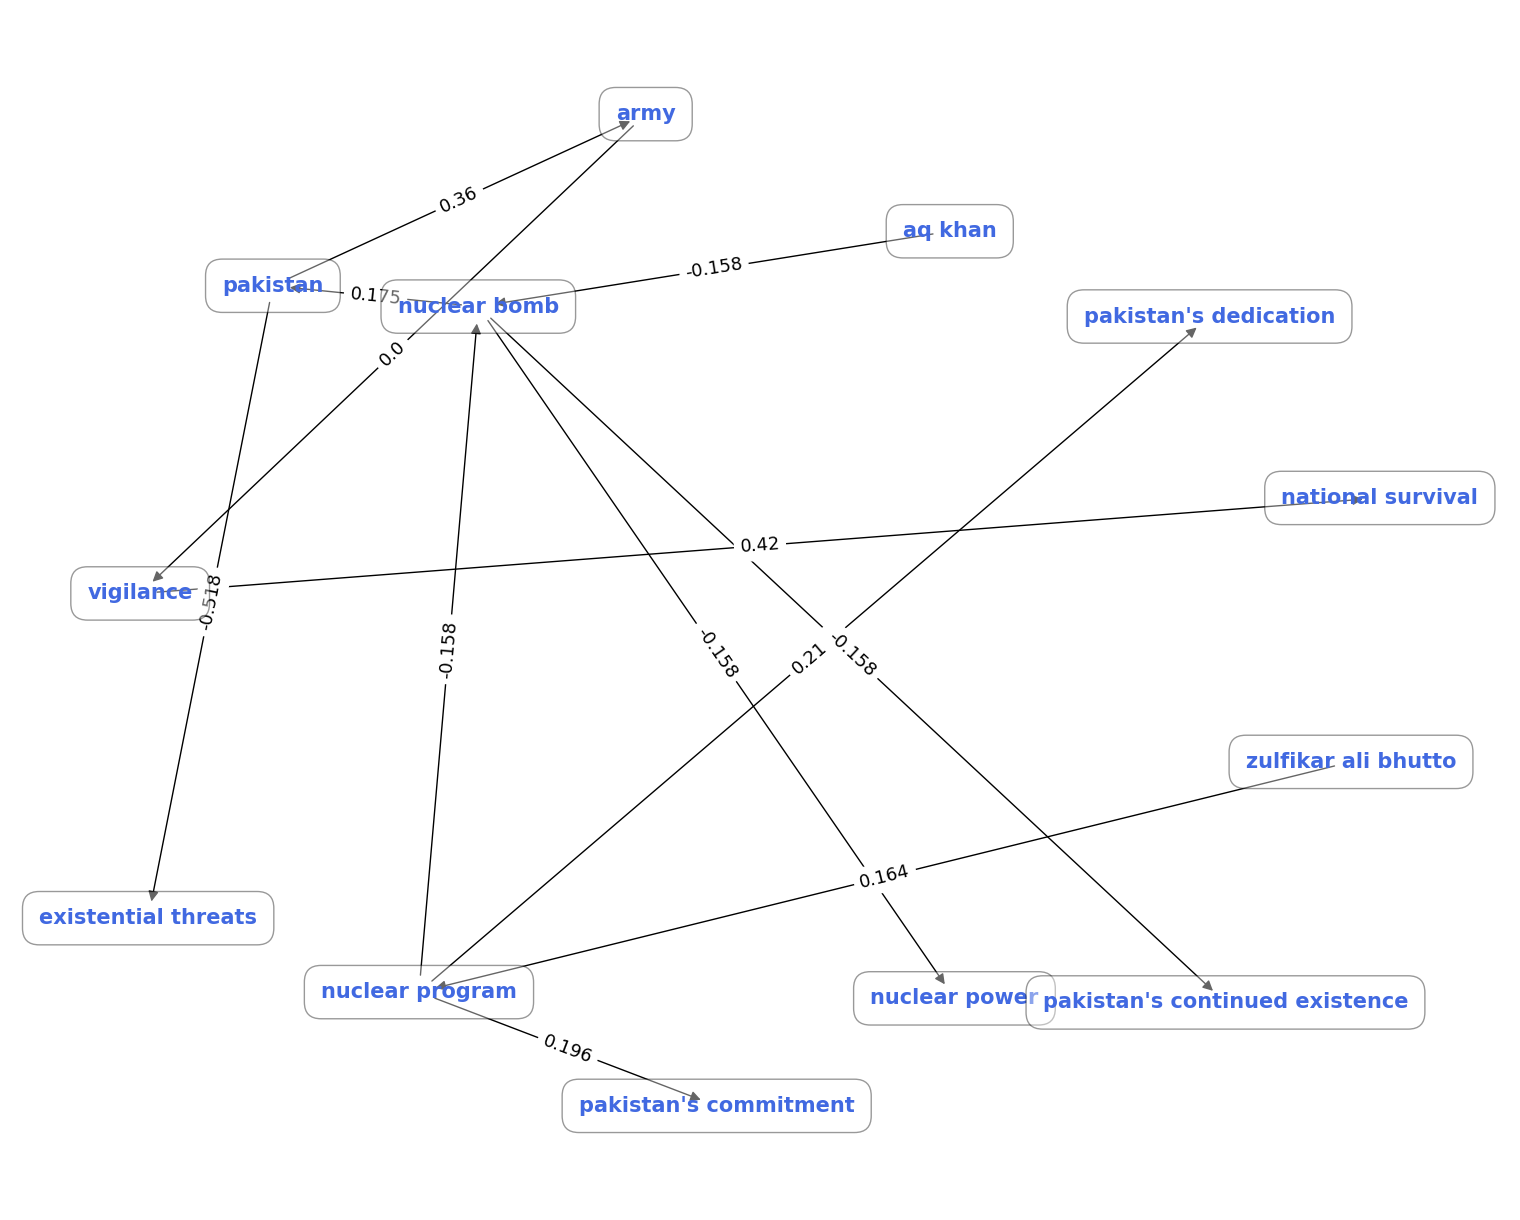

In [130]:
# dagCauseWeights = []
cwg = nx.DiGraph()

for ce,w in zip(dagCauseTriples, weights):
    s = str(ce[0])    
    d = str(ce[2])
#     w = GetCAstLogicStrength(p[0])
    cwg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    cwg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cwg.add_edge(s, d, predicate=w)
    
print("Nodes:",len(cwg.nodes))
print("Edges:",len(cwg.edges))

for e in cwg.edges(data=True):
    print(e[0],",",e[2],",",e[1])
    

pos = nx.spring_layout(cwg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cwg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cwg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cwg,'predicate')
#edge_labels2 = nx.get_edge_attributes(cwg,'polarity')
#edge_labels3 = nx.get_edge_attributes(cwg,'weight')

nx.draw_networkx_edge_labels(cwg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Plot the Polarized Causal Graph on using Pyvis "Polarized Causal Graph.html" file

# Compute CPs using CAST Logic

In [131]:
def FromTruthTable(i,inputs):
    count = 0

    if inputs==1:
        for a in range(1, -1, -1):
            if i == count:
                return (a)
            count = count+1

    if inputs==2:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                if i == count:
                    t = (a,b)
                    return t
                count = count+1
        
    elif inputs==3:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    if i == count:
                        t = (a,b,c)
                        return t
                    count = count+1
    
    elif inputs==4:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        if i == count:
                            t = (a,b,c,d)
                            return t
                        count = count+1

    elif inputs==5:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            if i == count:
                                t = (a,b,c,d,e)
                                return t
                            count = count+1
                            
    elif inputs==6:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                if i == count:
                                    t = (a,b,c,d,e,f)
                                    return t
                                count = count+1

class Tutorial1:
    #def __init__(self):
    def Add(self, net, id ,name, outcomes, x_pos, y_pos):
        e = self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos)
        nodeNames.append(net.get_node_name(e))
        nodeIds.append(net.get_node_id(e))
        nodeHandles.append(e)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def AddArcs(self, net, s, d):
        net.add_arc(s, d)
        net.write_file("./GeNie CBN/CBN.xdsl")

    def Addcpts(self, net, h, cpt):
        net. set_node_definition(h, cpt)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def create_cpt_node(self, net, id, name, outcomes, x_pos, y_pos):
        handle = net.add_node(pysmile.NodeType.CPT, id)
        net.set_node_name(handle, name)
        net.set_node_position(handle, x_pos, y_pos, 85, 55)
        initial_outcome_count = net.get_outcome_count(handle)
        for i in range(0, initial_outcome_count):
            net.set_outcome_id(handle, i, outcomes[i])
        for i in range(initial_outcome_count, len(outcomes)):
            net.add_outcome(handle, outcomes[i])
        return handle
    
    def print_cpt_matrix(self, net, node_handle):
        cpt = net.get_node_definition(node_handle)
        return cpt
    

net = pysmile.Network()
obj = Tutorial1()
outcomes = ["True","False"]
nodeNames = []    
nodeIds = []
nodeHandles = []
# cpts=[]
PDs = []
baseline = 0.1
x = 160
y = 40

for node in cwg.nodes: 
    obj.Add(net, str(node),str(node), outcomes, x, y)
        
for e in cwg.edges():
    for id,name in zip(nodeIds,nodeNames):
        if name == e[0]:
            s = id
        if name == e[1]:
            d = id 
    obj.AddArcs(net, s, d)
    
for handle,name in zip(nodeHandles,nodeNames): 
    print("Handle:" + str(handle))
    print("Node:" + name)
    print(net.get_outcome_ids(handle))
    parent_ids = net.get_parent_ids(handle)
    num_parents = len(parent_ids)
    print("Number of Parents:" + str(num_parents))
    cpt = []
    parent_names = []
    totalCols = 1
    if num_parents == 0:
        cpt.append(baseline)
        cpt.append(1 - baseline)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")
    elif num_parents > 0:
        for par in parent_ids:
                parent_names.append(net.get_node_name(par))
                totalCols = 2 ** num_parents
        print("Names of Parents:" + str(parent_names))
        print("totalCols:" + str(totalCols))
        for j in range(0, totalCols):
            print("j: "+str(j))
            PI = 1
            NI = 1
            ans = FromTruthTable(j,num_parents)
            print("From Dummy: "+str(ans))
            #for parent in parent_names:
            for p in range(0,len(parent_names)):
                for edge in cwg.edges(data=True):
                    if str(parent_names[p]) == str(edge[0]) and str(name) == str(edge[1]):
                        for nbr, eattr in edge[2].items():
                            if nbr == "predicate":
                                polarity = eattr
                        break
                print("Parent: " + parent_names[p])
                print("Polarity: " + str(polarity))
                print("p: "+str(p))
                if num_parents > 1:
                    if ans[p] == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                else:
                    if ans == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                if polarity >= 0:
                    #polarity = polarity/4
                    PI = PI * (1 - polarity)
                else:
                    #polarity = polarity/ (-4)
                    NI = NI * (1 - abs(polarity))
            PI = 1 - PI
            NI = 1 - NI
            AI = abs(PI - NI) / (1 - min(PI, NI))  
            CP = 0
            if PI > NI:
                CP = baseline + ((1 - baseline) * AI)
            elif PI < NI:
                CP = baseline - (baseline * AI)
            elif PI == NI:
                CP = baseline
            if CP == 0:
                CP = 0.01
            cpt.append(round(CP, 3))
            cpt.append(round((1 - CP), 3))
            pds = []
            pds.append(round(CP, 3))
            pds.append(round((1 - CP), 3))
            PDs.append(pds)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")

Handle:0
Node:zulfikar ali bhutto
['True', 'False']
Number of Parents:0
CPT:[0.1, 0.9]
CPT from Network:
[0.1, 0.9]
********************************************************************
Handle:1
Node:nuclear program
['True', 'False']
Number of Parents:1
Names of Parents:['zulfikar ali bhutto']
totalCols:2
j: 0
From Dummy: 1
Parent: zulfikar ali bhutto
Polarity: 0.164
p: 0
j: 1
From Dummy: 0
Parent: zulfikar ali bhutto
Polarity: 0.164
p: 0
New Polarity: 0
CPT:[0.248, 0.752, 0.1, 0.9]
CPT from Network:
[0.248, 0.752, 0.1, 0.9]
********************************************************************
Handle:2
Node:pakistan's commitment
['True', 'False']
Number of Parents:1
Names of Parents:['nuclear program']
totalCols:2
j: 0
From Dummy: 1
Parent: nuclear program
Polarity: 0.196
p: 0
j: 1
From Dummy: 0
Parent: nuclear program
Polarity: 0.196
p: 0
New Polarity: 0
CPT:[0.276, 0.724, 0.1, 0.9]
CPT from Network:
[0.276, 0.724, 0.1, 0.9]
**************************************************************

# Set PDs for KL-Divergence

In [132]:
P = PDs
# Q for Pakistan's Nuclear Pride
Q = [[0.703, 0.297], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.97, 0.03], [0.703, 0.297], [0.91, 0.09], [0.1, 0.9], [0.703, 0.297], [0.1, 0.9], [0.991, 0.009], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.703, 0.297], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.703, 0.297], [0.1, 0.9], [0.703, 0.297], [0.1, 0.9]]
print(len(P))
print(P)
print(len(Q))
print(Q)

24
[[0.248, 0.752], [0.1, 0.9], [0.276, 0.724], [0.1, 0.9], [0.296, 0.704], [0.1, 0.9], [0.071, 0.929], [0.084, 0.916], [0.084, 0.916], [0.1, 0.9], [0.258, 0.742], [0.1, 0.9], [0.084, 0.916], [0.1, 0.9], [0.048, 0.952], [0.1, 0.9], [0.424, 0.576], [0.1, 0.9], [0.1, 0.9], [0.1, 0.9], [0.478, 0.522], [0.1, 0.9], [0.084, 0.916], [0.1, 0.9]]
24
[[0.703, 0.297], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.97, 0.03], [0.703, 0.297], [0.91, 0.09], [0.1, 0.9], [0.703, 0.297], [0.1, 0.9], [0.991, 0.009], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.703, 0.297], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.703, 0.297], [0.1, 0.9], [0.703, 0.297], [0.1, 0.9]]


# Compute KL Divergence

### Execute from cell 'Benchmark weights from Domain Expert' to above cell then execute the below cell

In [133]:
# https://www.pythonclear.com/data-science/python-kl-divergence/
# https://www.statology.org/kl-divergence-python/

# PR Unit 16
# If two distributions perfectly match, D_{KL} (p||q) = 0 otherwise it can take values between 0 and ∞. 
# Lower the KL divergence value, the better we have matched the true distribution with our approximation.

kl = []
for i in range(0,len(P)):
    k = kl_div(Q[i],P[i])
    kl.append(k.sum())

kl = np.array(kl)
kl_divergence = round((kl.sum()),3)
print(kl_divergence)

16.269


# Overall Polarity of Triples at two (sentence and token) levels

# Overall Polarity of Sentences at two (sentence and token) Levels

# Plot the Polarized/Modified Causal Graph.

# DeMorgan's Vs. CAST Logic

Nodes: 5
Edges: 4
A , {'predicate': 0.4} , Y
B , {'predicate': 0.7} , Y
C , {'predicate': -0.2} , Y
D , {'predicate': -0.1} , Y


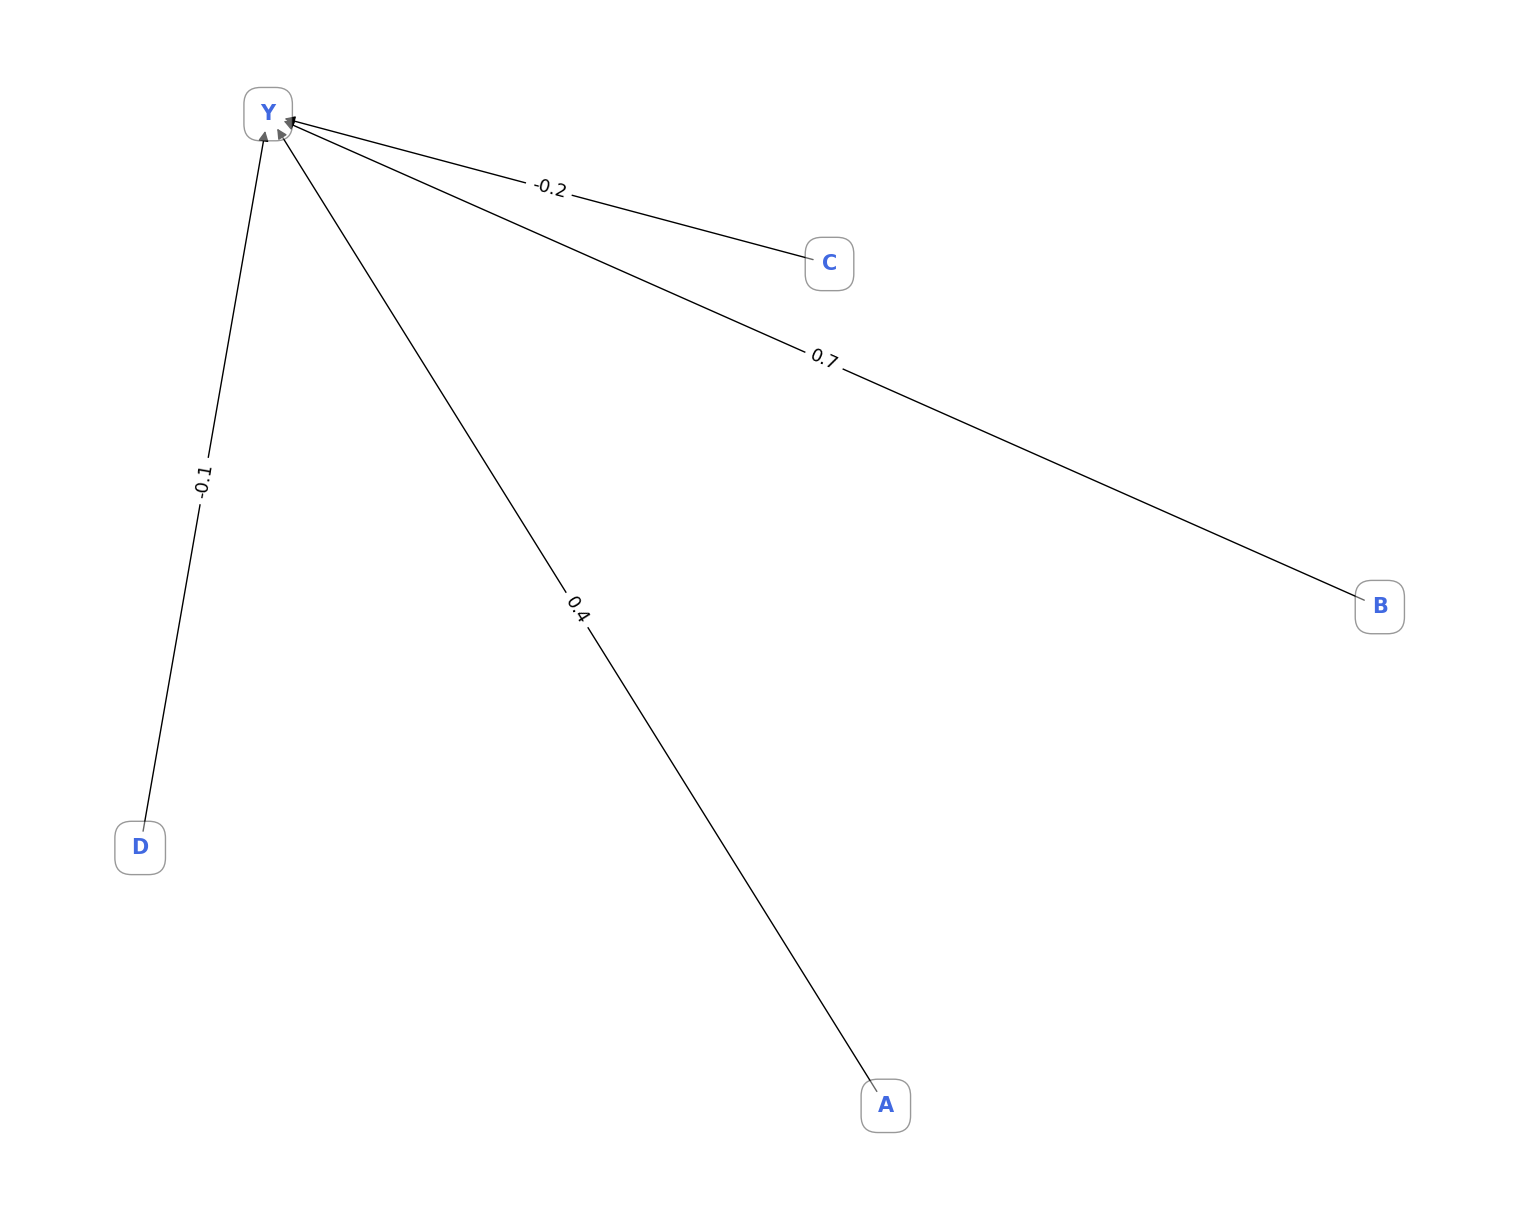

In [27]:
# dagCauseWeights = []
cwg = nx.DiGraph()

dagCauseTriples = [("A","Y"),("B","Y"),("C","Y"),("D","Y")]
weights = [0.4,0.7,-0.2,-0.1]

for ce,w in zip(dagCauseTriples, weights):
    s = str(ce[0])    
    d = str(ce[1])
#     w = GetCAstLogicStrength(p[0])
    cwg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    cwg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cwg.add_edge(s, d, predicate=w)
    
print("Nodes:",len(cwg.nodes))
print("Edges:",len(cwg.edges))

for e in cwg.edges(data=True):
    print(e[0],",",e[2],",",e[1])
    

pos = nx.spring_layout(cwg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cwg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cwg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cwg,'predicate')
#edge_labels2 = nx.get_edge_attributes(cwg,'polarity')
#edge_labels3 = nx.get_edge_attributes(cwg,'weight')

nx.draw_networkx_edge_labels(cwg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [28]:
def FromTruthTable(i,inputs):
    count = 0

    if inputs==1:
        for a in range(1, -1, -1):
            if i == count:
                return (a)
            count = count+1

    if inputs==2:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                if i == count:
                    t = (a,b)
                    return t
                count = count+1
        
    elif inputs==3:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    if i == count:
                        t = (a,b,c)
                        return t
                    count = count+1
    
    elif inputs==4:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        if i == count:
                            t = (a,b,c,d)
                            return t
                        count = count+1

    elif inputs==5:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            if i == count:
                                t = (a,b,c,d,e)
                                return t
                            count = count+1
                            
    elif inputs==6:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                if i == count:
                                    t = (a,b,c,d,e,f)
                                    return t
                                count = count+1

class Tutorial1:
    #def __init__(self):
    def Add(self, net, id ,name, outcomes, x_pos, y_pos):
        e = self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos)
        nodeNames.append(net.get_node_name(e))
        nodeIds.append(net.get_node_id(e))
        nodeHandles.append(e)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def AddArcs(self, net, s, d):
        net.add_arc(s, d)
        net.write_file("./GeNie CBN/CBN.xdsl")

    def Addcpts(self, net, h, cpt):
        net. set_node_definition(h, cpt)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def create_cpt_node(self, net, id, name, outcomes, x_pos, y_pos):
        handle = net.add_node(pysmile.NodeType.CPT, id)
        net.set_node_name(handle, name)
        net.set_node_position(handle, x_pos, y_pos, 85, 55)
        initial_outcome_count = net.get_outcome_count(handle)
        for i in range(0, initial_outcome_count):
            net.set_outcome_id(handle, i, outcomes[i])
        for i in range(initial_outcome_count, len(outcomes)):
            net.add_outcome(handle, outcomes[i])
        return handle
    
    def print_cpt_matrix(self, net, node_handle):
        cpt = net.get_node_definition(node_handle)
        return cpt
    

net = pysmile.Network()
obj = Tutorial1()
outcomes = ["True","False"]
nodeNames = []    
nodeIds = []
nodeHandles = []
# cpts=[]
PDs = []
baseline = 0.1
x = 160
y = 40

for node in cwg.nodes: 
    obj.Add(net, str(node),str(node), outcomes, x, y)
        
for e in cwg.edges():
    for id,name in zip(nodeIds,nodeNames):
        if name == e[0]:
            s = id
        if name == e[1]:
            d = id 
    obj.AddArcs(net, s, d)
    
for handle,name in zip(nodeHandles,nodeNames): 
    print("Handle:" + str(handle))
    print("Node:" + name)
    print(net.get_outcome_ids(handle))
    parent_ids = net.get_parent_ids(handle)
    num_parents = len(parent_ids)
    print("Number of Parents:" + str(num_parents))
    cpt = []
    parent_names = []
    totalCols = 1
    if num_parents == 0:
        cpt.append(baseline)
        cpt.append(1 - baseline)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")
    elif num_parents > 0:
        for par in parent_ids:
                parent_names.append(net.get_node_name(par))
                totalCols = 2 ** num_parents
        print("Names of Parents:" + str(parent_names))
        print("totalCols:" + str(totalCols))
        for j in range(0, totalCols):
            print("j: "+str(j))
            PI = 1
            NI = 1
            ans = FromTruthTable(j,num_parents)
            print("From Dummy: "+str(ans))
            #for parent in parent_names:
            for p in range(0,len(parent_names)):
                for edge in cwg.edges(data=True):
                    if str(parent_names[p]) == str(edge[0]) and str(name) == str(edge[1]):
                        for nbr, eattr in edge[2].items():
                            if nbr == "predicate":
                                polarity = eattr
                        break
                print("Parent: " + parent_names[p])
                print("Polarity: " + str(polarity))
                print("p: "+str(p))
                if num_parents > 1:
                    if ans[p] == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                else:
                    if ans == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                if polarity >= 0:
                    #polarity = polarity/4
                    PI = PI * (1 - polarity)
                else:
                    #polarity = polarity/ (-4)
                    NI = NI * (1 - abs(polarity))
            PI = 1 - PI
            NI = 1 - NI
            AI = abs(PI - NI) / (1 - min(PI, NI))  
            CP = 0
            if PI > NI:
                CP = baseline + ((1 - baseline) * AI)
            elif PI < NI:
                CP = baseline - (baseline * AI)
            elif PI == NI:
                CP = baseline
            if CP == 0:
                CP = 0.01
            cpt.append(round(CP, 3))
            cpt.append(round((1 - CP), 3))
            pds = []
            pds.append(round(CP, 3))
            pds.append(round((1 - CP), 3))
            PDs.append(pds)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")

Handle:0
Node:A
['True', 'False']
Number of Parents:0
CPT:[0.1, 0.9]
CPT from Network:
[0.1, 0.9]
********************************************************************
Handle:1
Node:Y
['True', 'False']
Number of Parents:4
Names of Parents:['A', 'B', 'C', 'D']
totalCols:16
j: 0
From Dummy: (1, 1, 1, 1)
Parent: A
Polarity: 0.4
p: 0
Parent: B
Polarity: 0.7
p: 1
Parent: C
Polarity: -0.2
p: 2
Parent: D
Polarity: -0.1
p: 3
j: 1
From Dummy: (1, 1, 1, 0)
Parent: A
Polarity: 0.4
p: 0
Parent: B
Polarity: 0.7
p: 1
Parent: C
Polarity: -0.2
p: 2
Parent: D
Polarity: -0.1
p: 3
New Polarity: 0
j: 2
From Dummy: (1, 1, 0, 1)
Parent: A
Polarity: 0.4
p: 0
Parent: B
Polarity: 0.7
p: 1
Parent: C
Polarity: -0.2
p: 2
New Polarity: 0
Parent: D
Polarity: -0.1
p: 3
j: 3
From Dummy: (1, 1, 0, 0)
Parent: A
Polarity: 0.4
p: 0
Parent: B
Polarity: 0.7
p: 1
Parent: C
Polarity: -0.2
p: 2
New Polarity: 0
Parent: D
Polarity: -0.1
p: 3
New Polarity: 0
j: 4
From Dummy: (1, 0, 1, 1)
Parent: A
Polarity: 0.4
p: 0
Parent: B
Pol

In [29]:
# https://towardsdatascience.com/understanding-kl-divergence-f3ddc8dff254
# https://www.pythonclear.com/data-science/python-kl-divergence/
# https://www.statology.org/kl-divergence-python/

# PR Unit 16
# If two distributions perfectly match, D_{KL} (p||q) = 0 otherwise it can take values between 0 and ∞. 
# Lower the KL divergence value, the better we have matched the true distribution with our approximation.

P = [0.603,0.670,0.754,0.838,0.331,0.368,0.414,0.46,0.525,0.584,0.657,0.73,0.072,0.08,0.09,0.1]
Q = [0.775,0.797,0.82,0.838,0.25,0.325,0.4,0.46,0.625,0.662,0.7,0.73,0.072,0.08,0.09,0.1]
kl = []
for i in range(0,len(P)):
    k = kl_div(P[i],Q[i])
    kl.append(k.sum())

kl = np.array(kl)
kl_divergence = round((kl.sum()),3)
print(kl_divergence)

0.064
